In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from yellowbrick.model_selection import rfecv
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import ppscore as ps
import plotly.express as pe
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 250
plt.show()

In [2]:
df = pd.read_csv('mushroom.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1995    sunken       scaly     brown     yes     foul        attached   
1996    sunken       scaly    purple     yes    musty        attached   
1997    convex     grooves     green     yes    fishy         notched   
1998      bell      smooth     white      no  pungent            free   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  veil_type veil_color  \
0         distant     broad       pink    tapering  ...    partial      brown   
1         crowded    narrow  chocolate   enlarging  ...  universal      brown   
2         crowded     broad     purple    tapering  ...  universal     yellow   
3           close     broad     orange   enlarging  ...    partial     yellow   
4         crowded    narrow     orange   enlarging  ...  universal      white   
...           ...       ...        ...         ...  ...        ...        ...   
1995      crowded    narrow  chocolate    tapering  ...    partial     orange   
1996      distant    narrow        red    tapering  ...    partial      white   
1997        close    narrow       pink    tapering  ...    partial      brown   
1998        close    narrow     orange   enlarging  ...  universal     yellow   
1999        close    narrow     purple   enlarging  ...    partial      white   

     ring_number   ring_type spore_print_color population  habitat      class  \
0            two   sheathing         chocolate  clustered    waste  poisonous   
1            two   sheathing             brown   numerous    waste     edible   
2            two   sheathing            purple   abundant    waste  poisonous   
3            two    cobwebby             green  clustered  grasses  poisonous   
4           none        none            yellow  clustered    urban  poisonous   
...          ...         ...               ...        ...      ...        ...   
1995         one     flaring            purple   abundant   leaves  poisonous   
1996         one        zone            yellow   numerous    waste  poisonous   
1997         two  evanescent            yellow   abundant    woods  poisonous   
1998         one    cobwebby             brown   solitary    woods  poisonous   
1999         two       large             white   numerous    urban  poisonous   

     stalk_height cap_diameter  
0       14.276173     5.054983  
1        3.952715    19.068319  
2        9.054265     7.205884  
3        5.226499    20.932692  
4       14.037532    12.545245  
...           ...          ...  
1995     5.877891    17.464145  
1996     6.500840    13.501957  
1997    13.558064    11.270020  
1998    11.092703     8.423199  
1999    13.066414    21.056642  

[2000 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [4]:
df.isna().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [5]:
df.describe().T

count       mean       std  min       25%        50%  \
stalk_height  2000.0   8.449118  3.697217  2.0  5.291009   8.318596   
cap_diameter  2000.0  12.314345  7.048845  1.0  5.723521  12.124902   

                    75%        max  
stalk_height  11.781272  15.095066  
cap_diameter  18.698605  25.000054

In [6]:
# Checking whether data is linearly separable
pe.scatter_3d(data_frame = df, x = df['cap_color'], y = df['cap_shape'], z = df['cap_surface'], color = df['class'])

In [7]:
pe.scatter_3d(data_frame = df, x = df['gill_attachment'], y = df['gill_color'], z = df['gill_spacing'], color = df['class'])

In [8]:
# We can say that data is not linearly separable.

In [9]:
# selecting categorical columns from dataframe for visualizations and encoding purpose.
cat_colms = df.select_dtypes(include='object')
cat_colms

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1995    sunken       scaly     brown     yes     foul        attached   
1996    sunken       scaly    purple     yes    musty        attached   
1997    convex     grooves     green     yes    fishy         notched   
1998      bell      smooth     white      no  pungent            free   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  \
0         distant     broad       pink    tapering  ...   
1         crowded    narrow  chocolate   enlarging  ...   
2         crowded     broad     purple    tapering  ...   
3           close     broad     orange   enlarging  ...   
4         crowded    narrow     orange   enlarging  ...   
...           ...       ...        ...         ...  ...   
1995      crowded    narrow  chocolate    tapering  ...   
1996      distant    narrow        red    tapering  ...   
1997        close    narrow       pink    tapering  ...   
1998        close    narrow     orange   enlarging  ...   
1999        close    narrow     purple   enlarging  ...   

     stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
0                      gray                 yellow    partial      brown   
1                  cinnamon                  brown  universal      brown   
2                    yellow                   gray  universal     yellow   
3                    yellow                   pink    partial     yellow   
4                      gray                  white  universal      white   
...                     ...                    ...        ...        ...   
1995                   pink                 orange    partial     orange   
1996                   pink                 orange    partial      white   
1997                  brown                    red    partial      brown   
1998                   gray                   pink  universal     yellow   
1999                   gray                  brown    partial      white   

     ring_number   ring_type spore_print_color population  habitat      class  
0            two   sheathing         chocolate  clustered    waste  poisonous  
1            two   sheathing             brown   numerous    waste     edible  
2            two   sheathing            purple   abundant    waste  poisonous  
3            two    cobwebby             green  clustered  grasses  poisonous  
4           none        none            yellow  clustered    urban  poisonous  
...          ...         ...               ...        ...      ...        ...  
1995         one     flaring            purple   abundant   leaves  poisonous  
1996         one        zone            yellow   numerous    waste  poisonous  
1997         two  evanescent            yellow   abundant    woods  poisonous  
1998         one    cobwebby             brown   solitary    woods  poisonous  
1999         two       large             white   numerous    urban  poisonous  

[2000 rows x 23 columns]

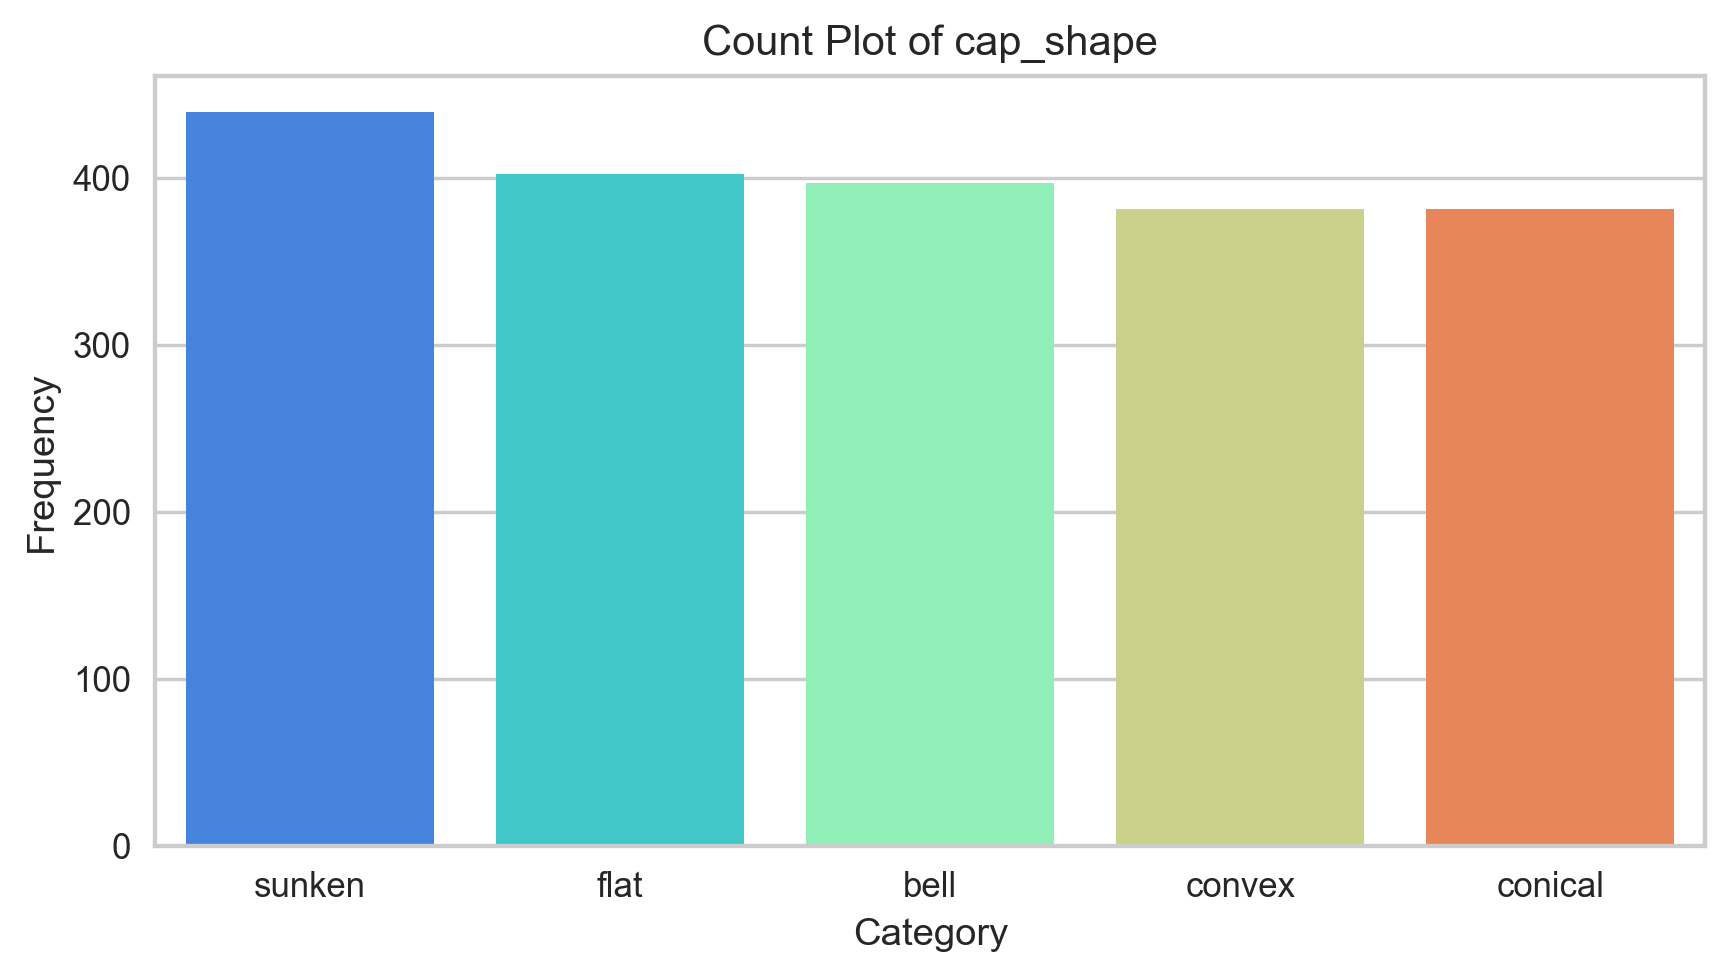

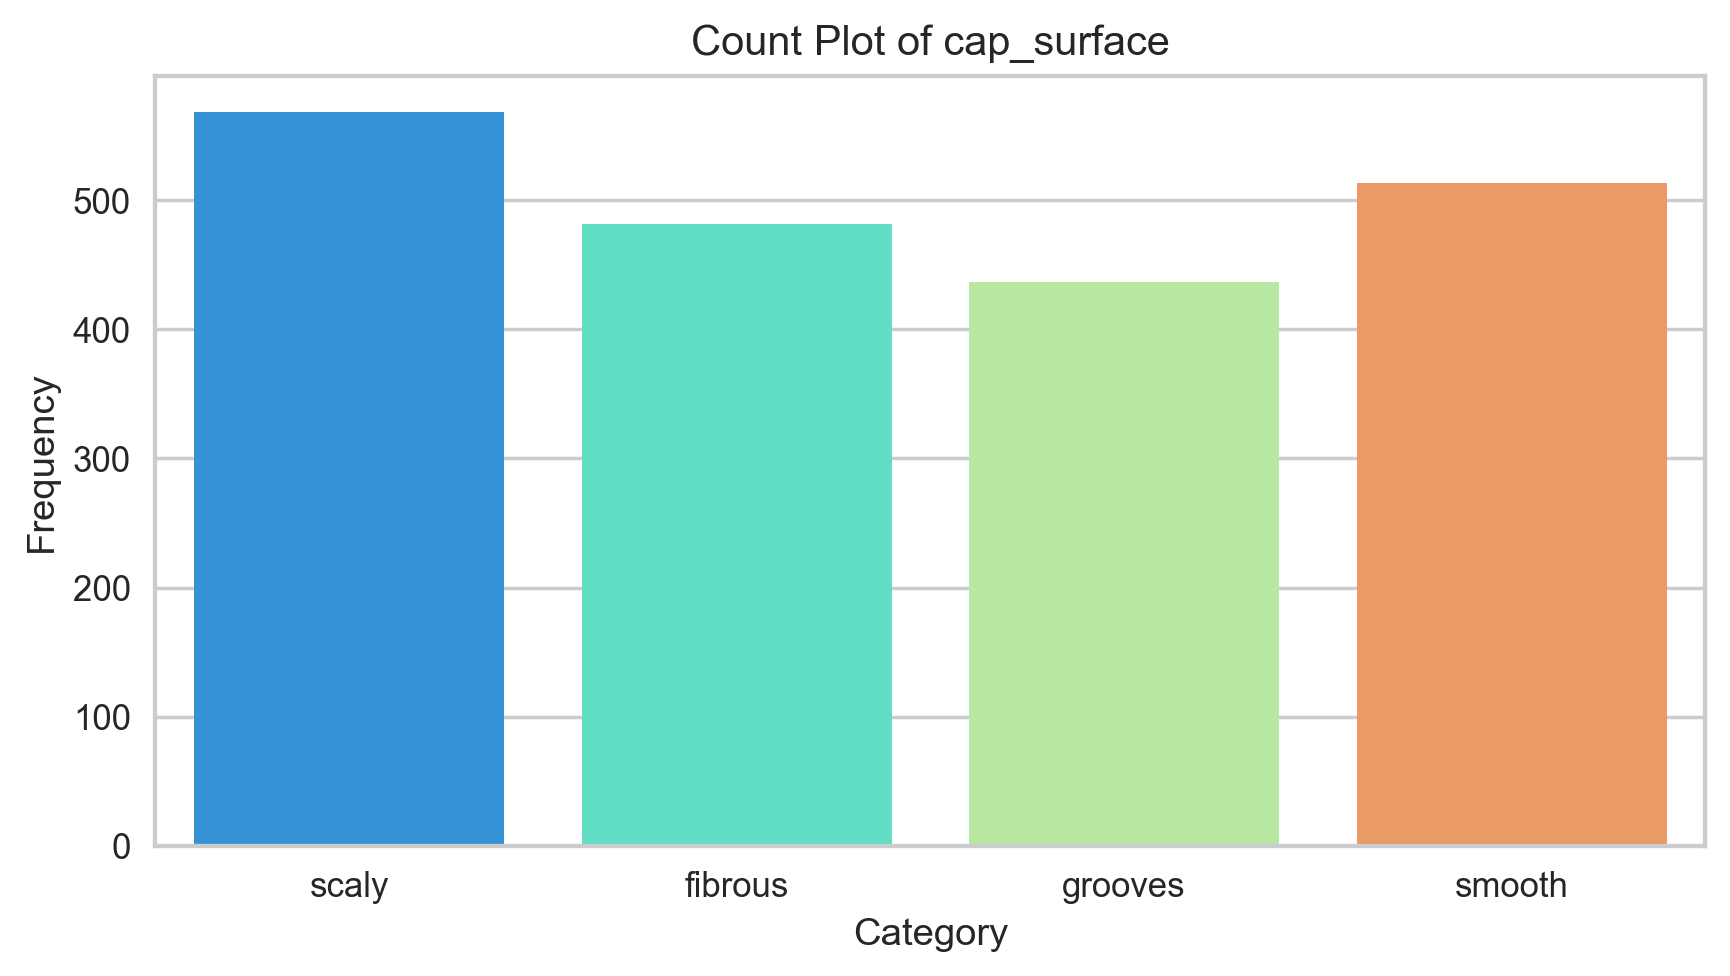

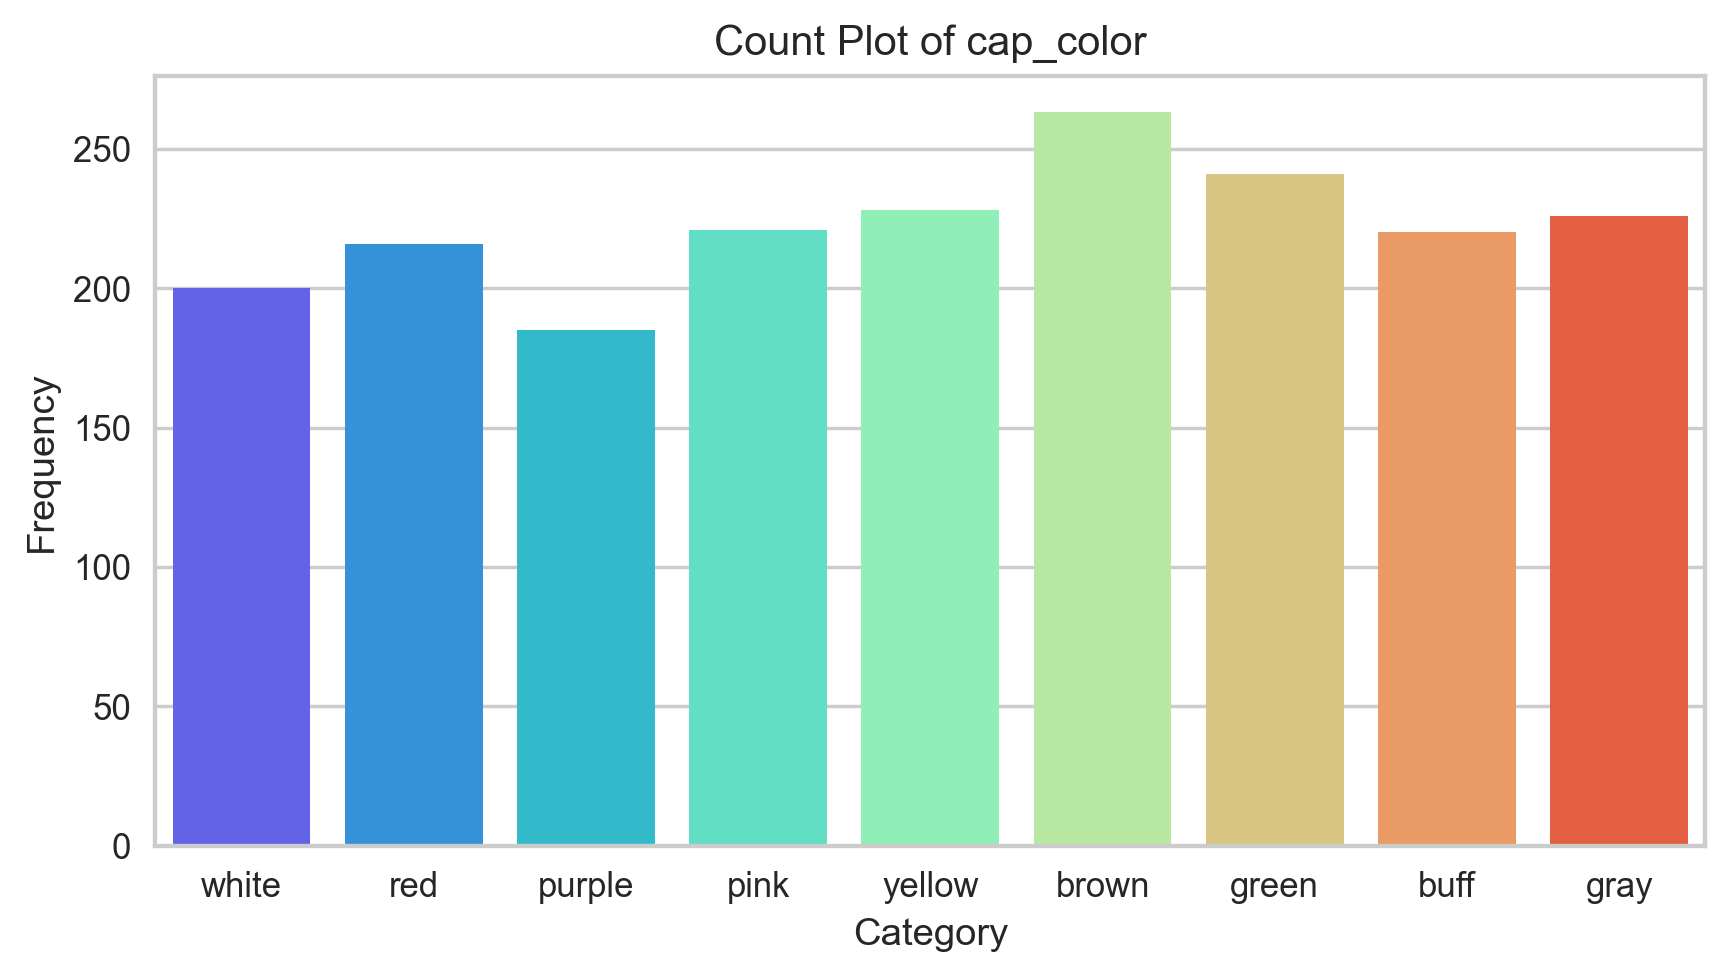

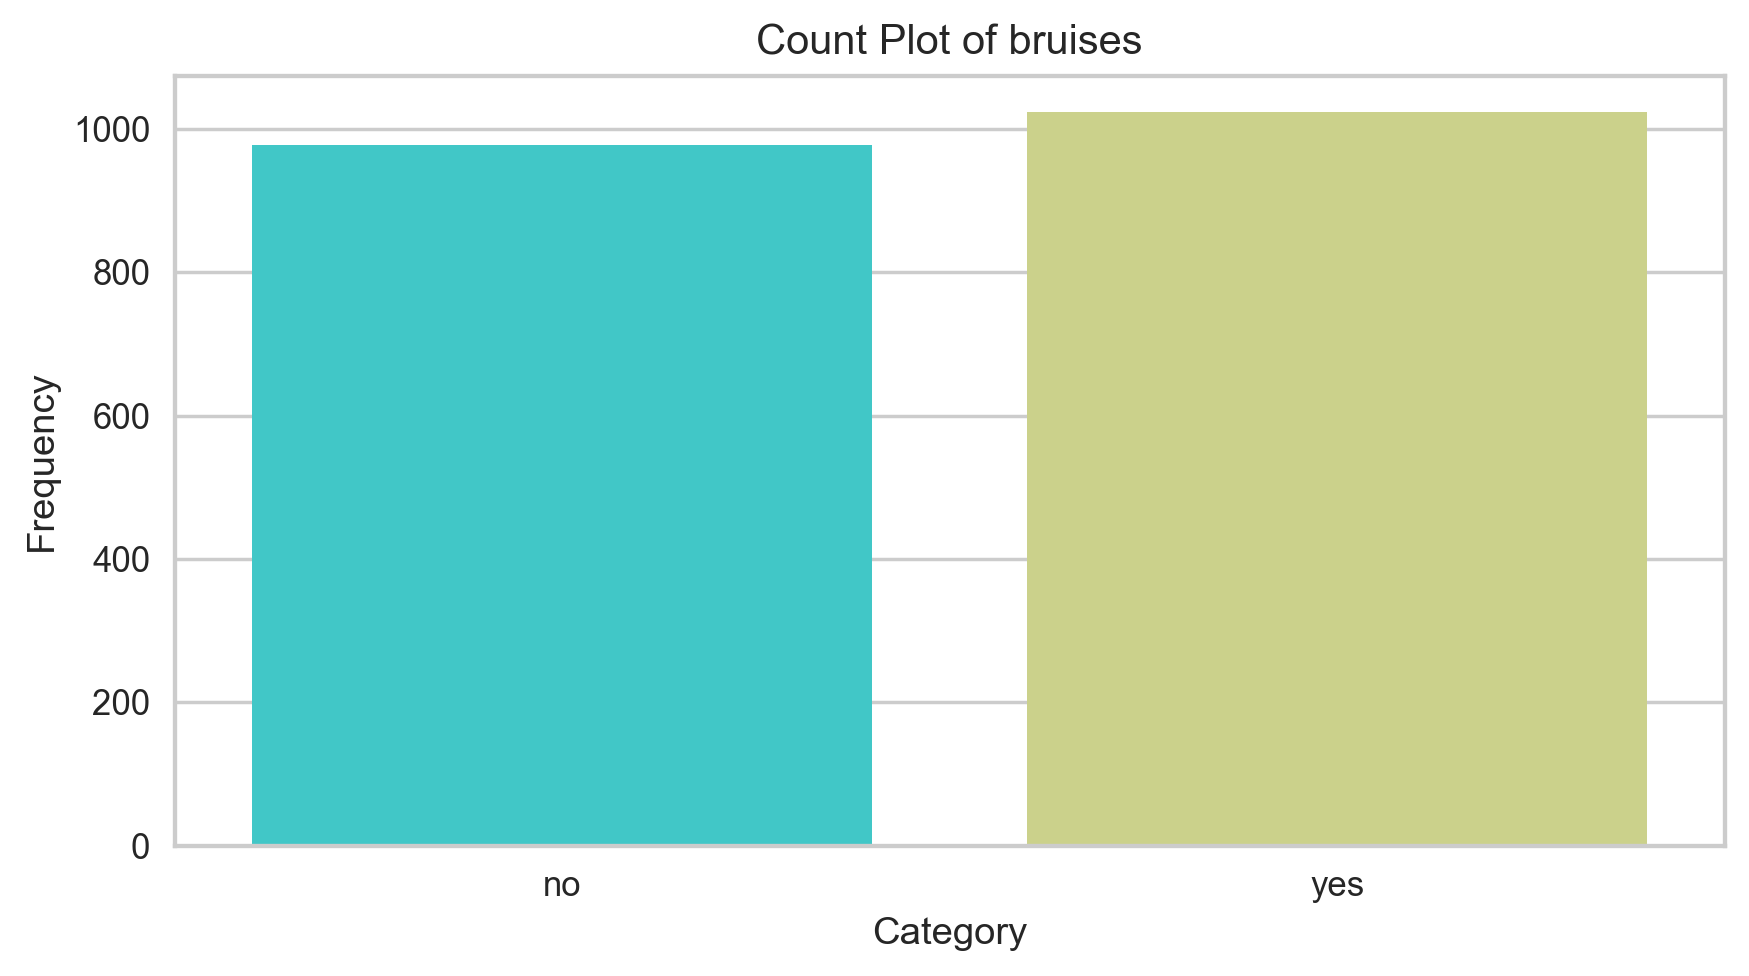

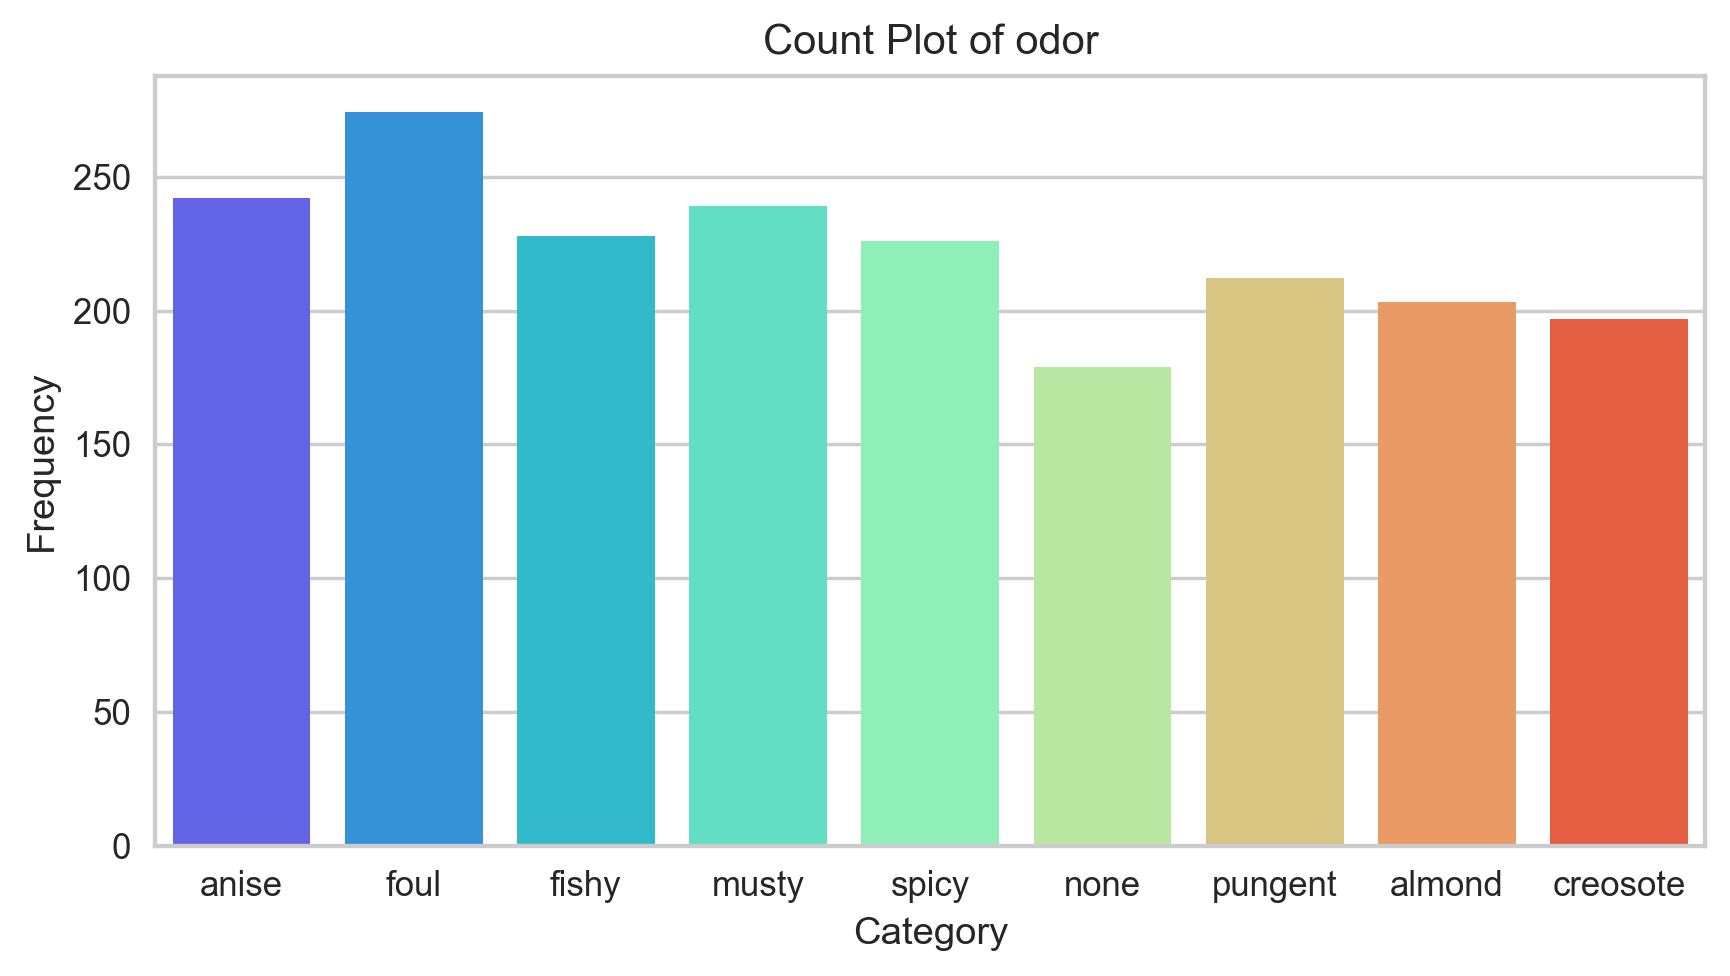

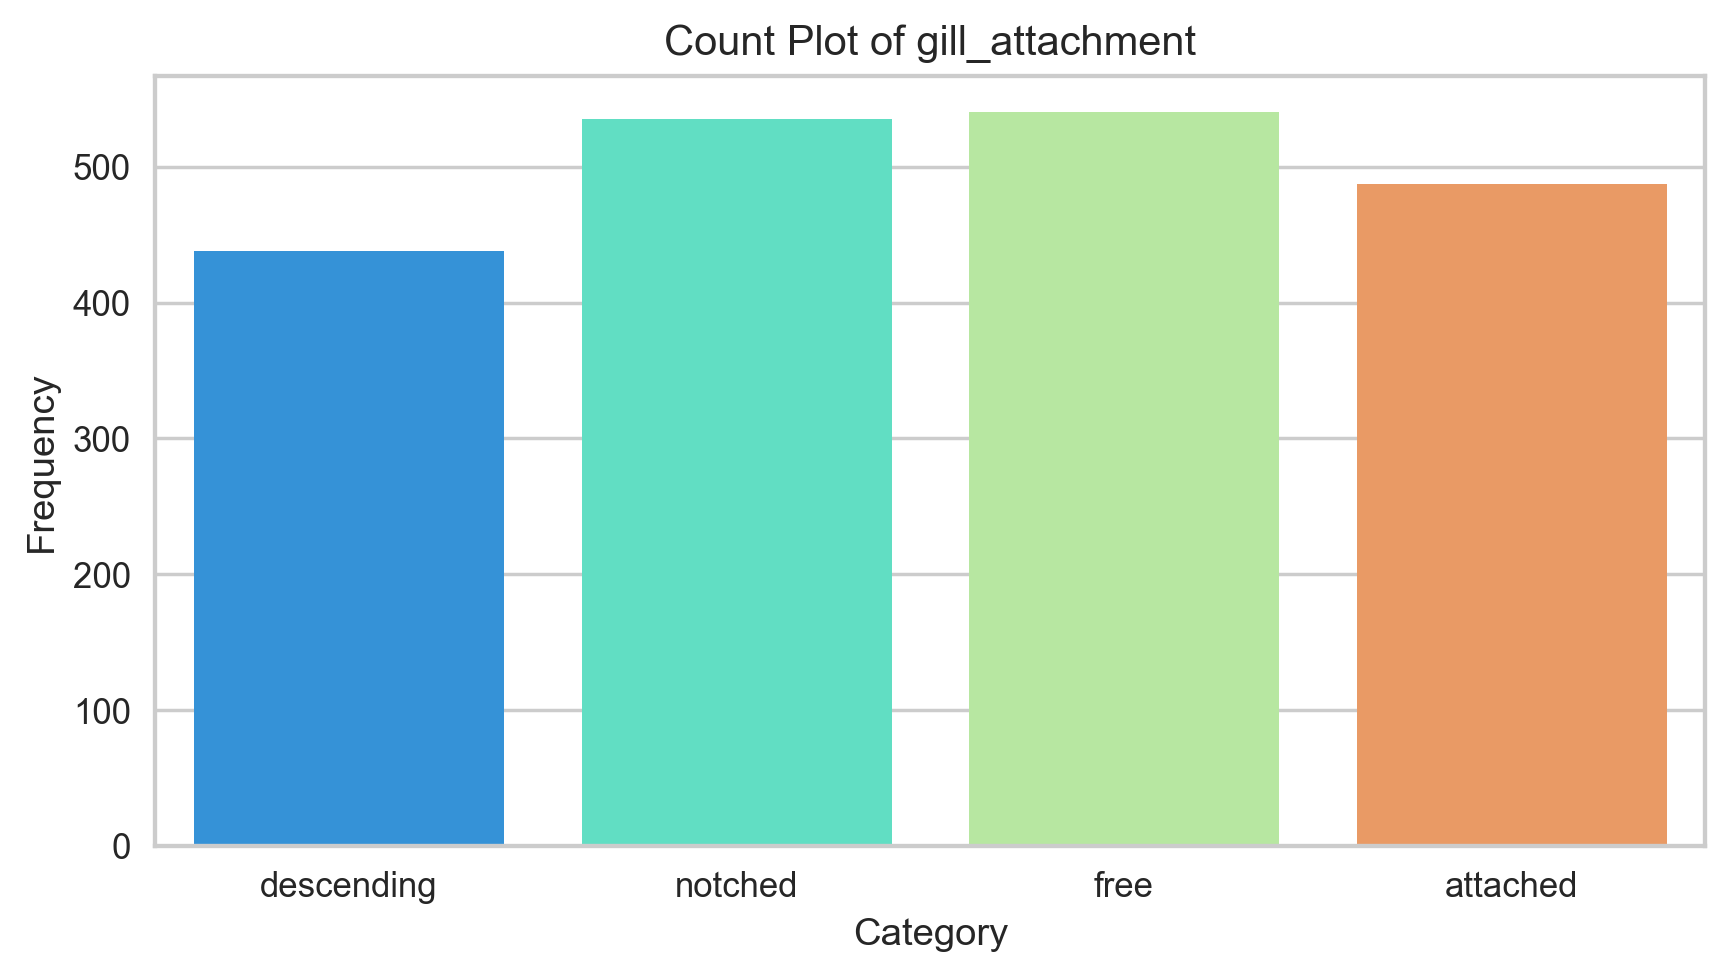

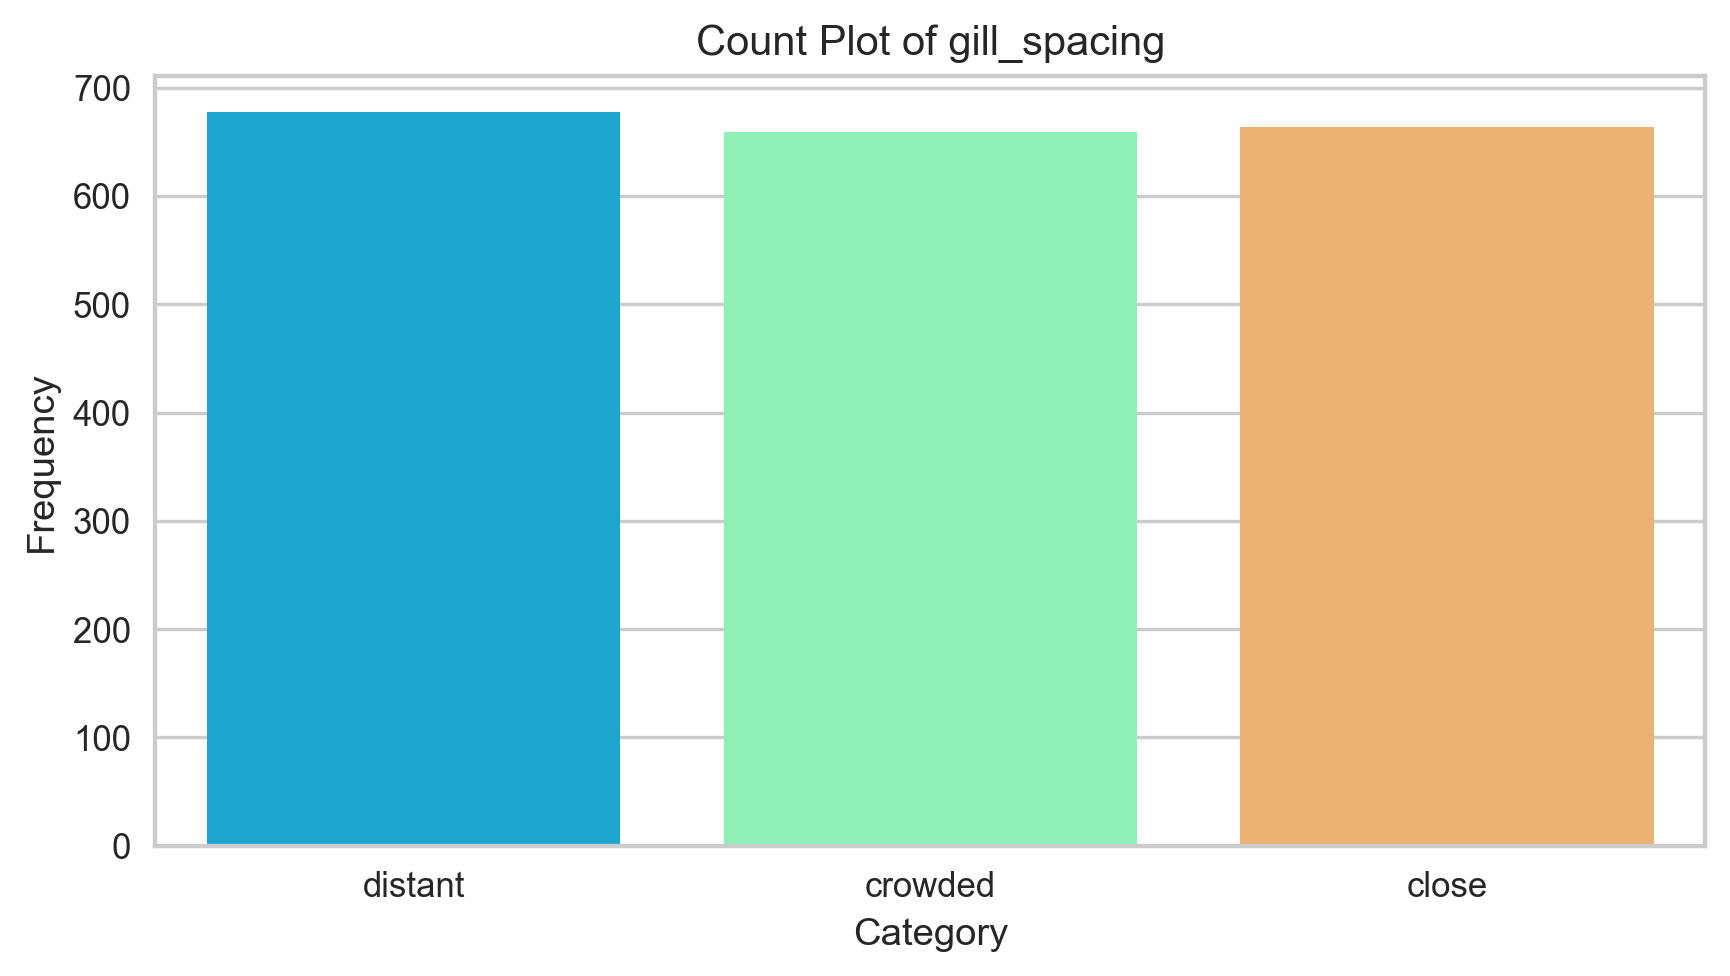

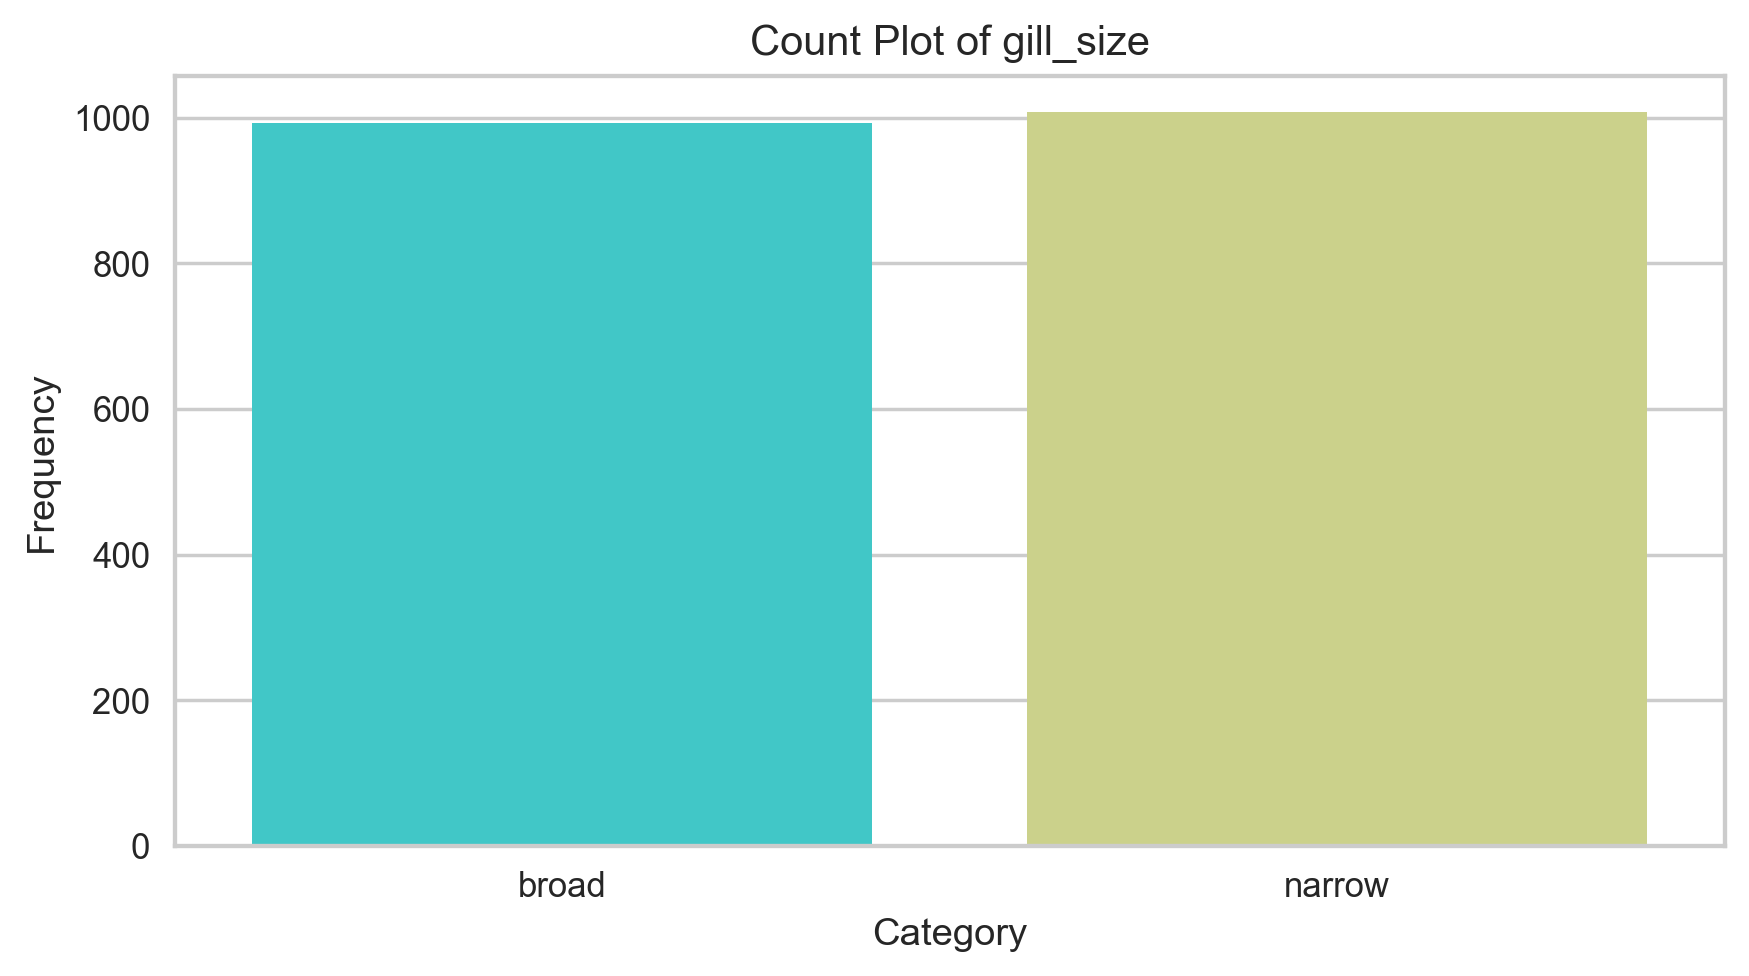

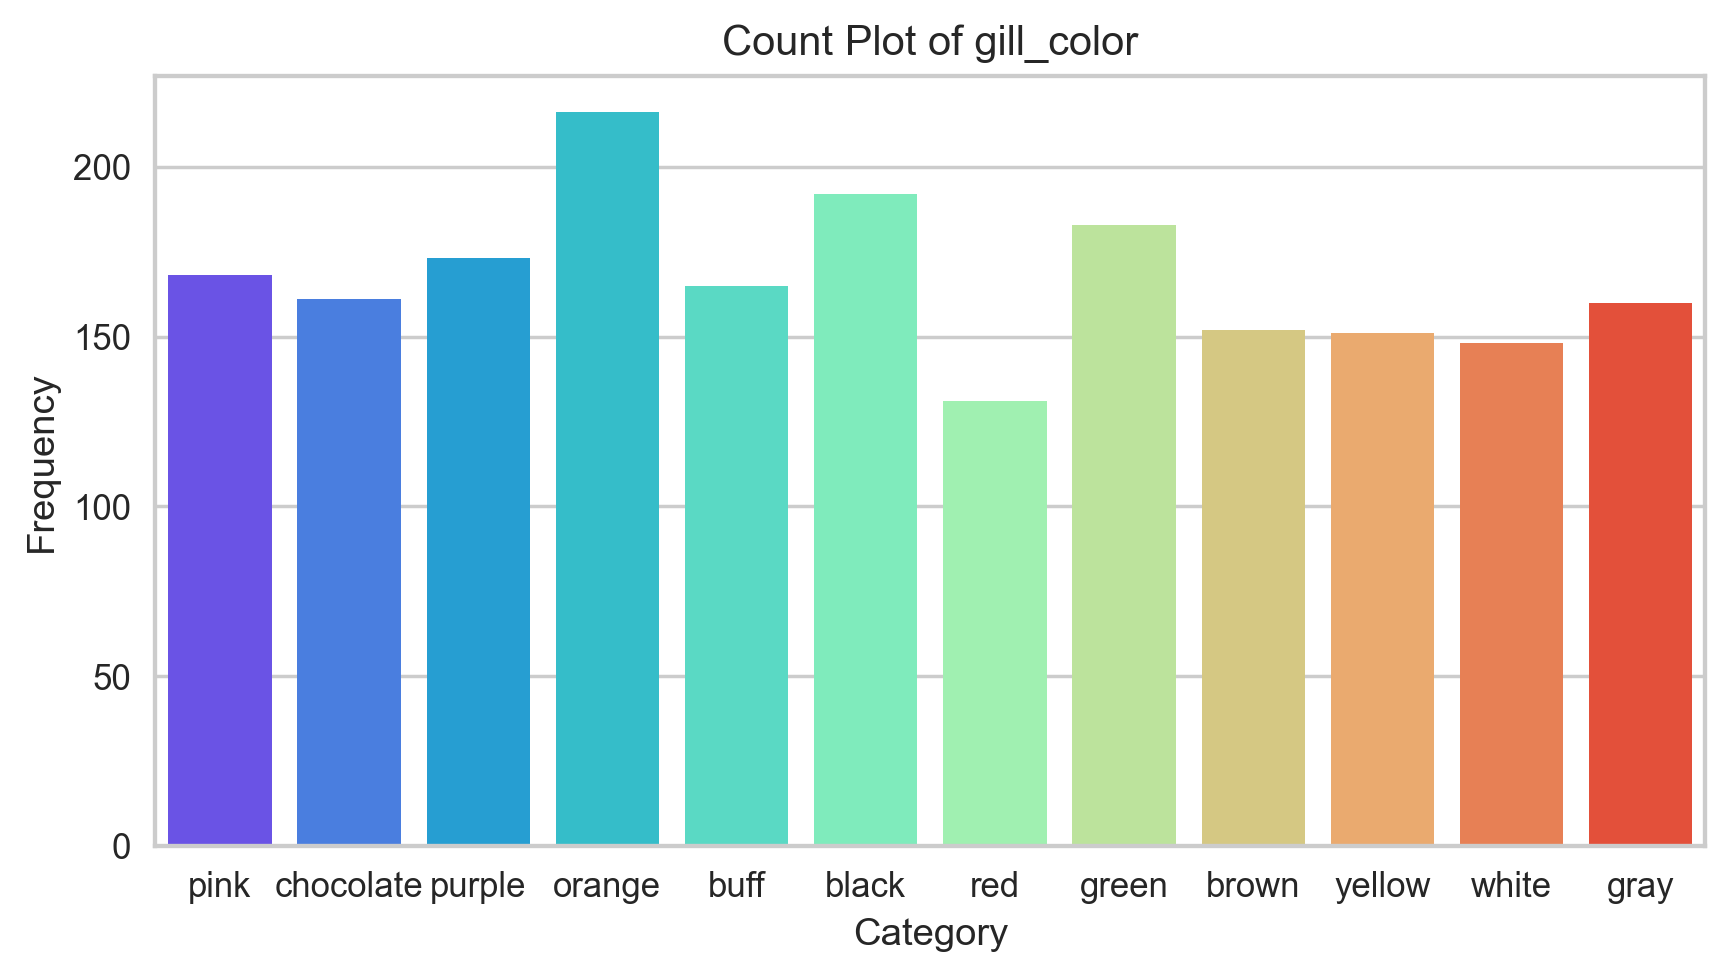

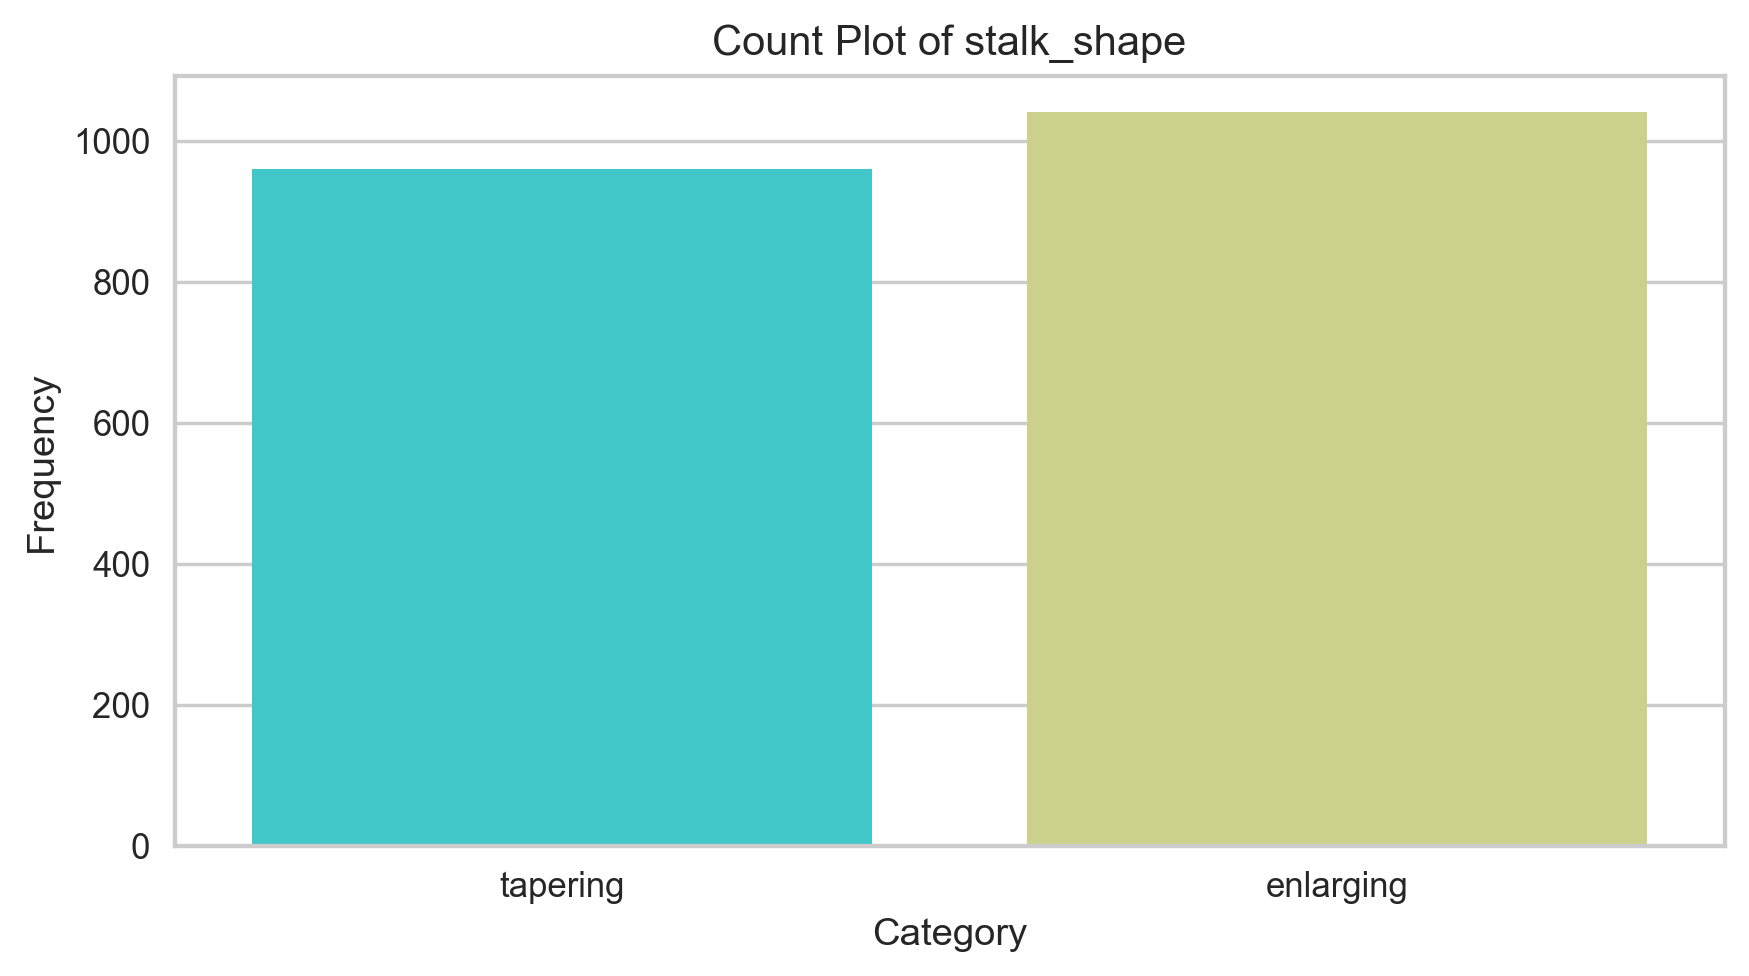

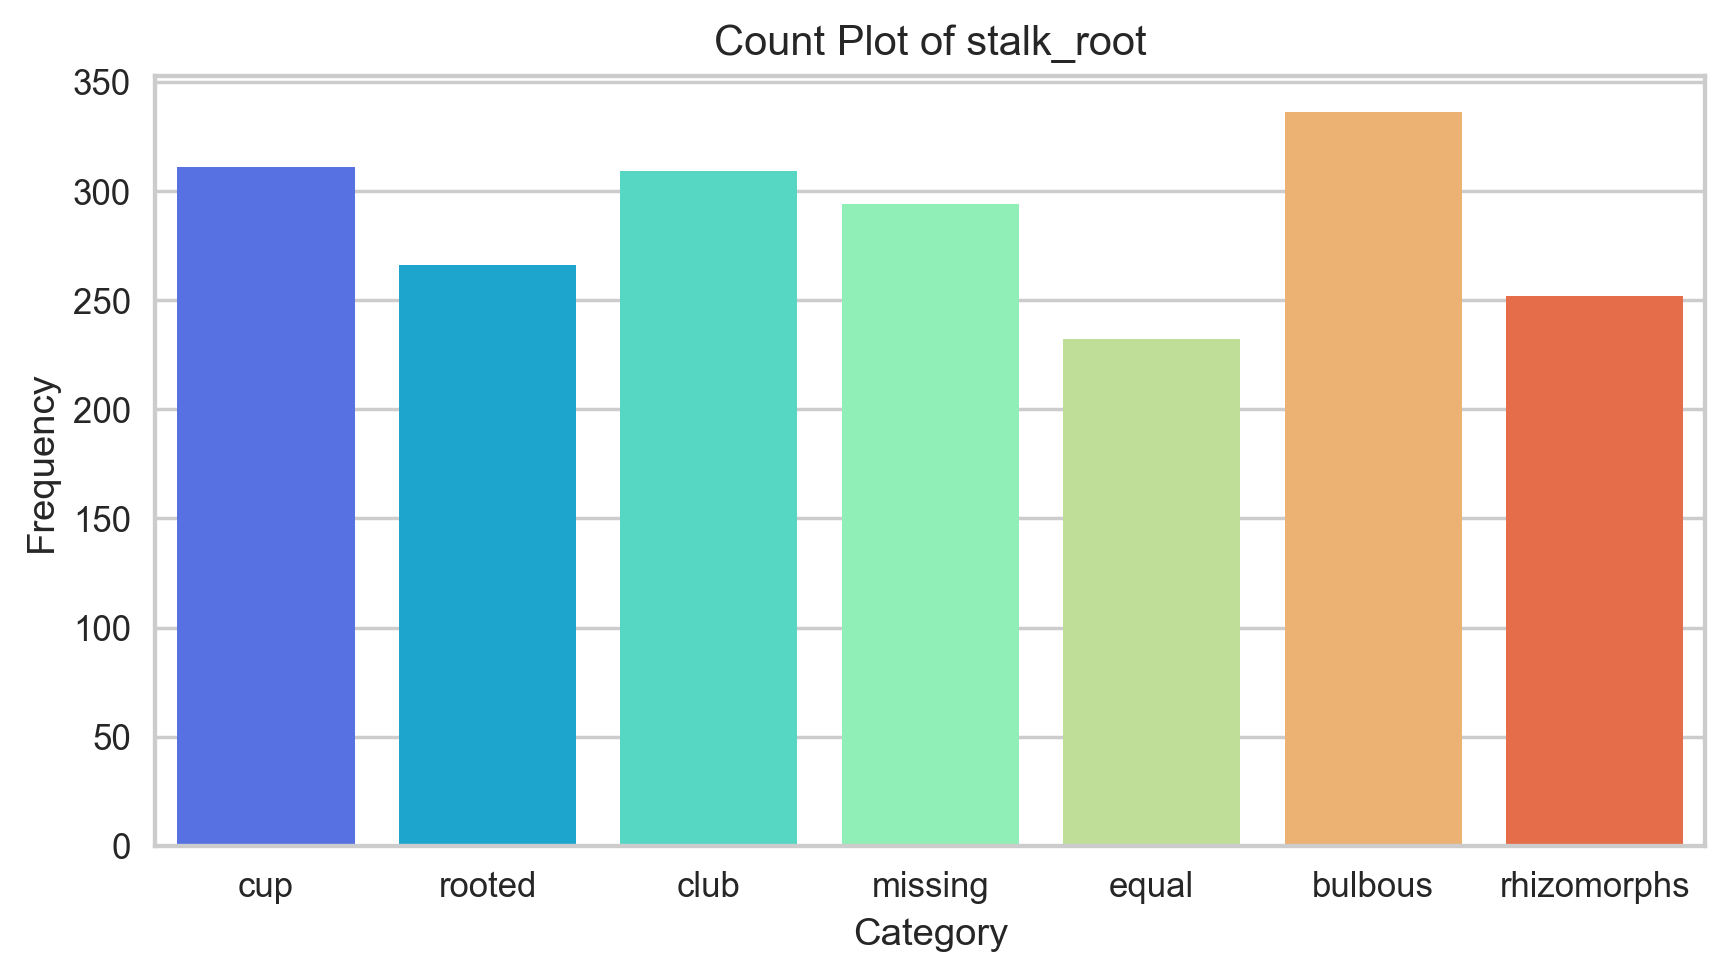

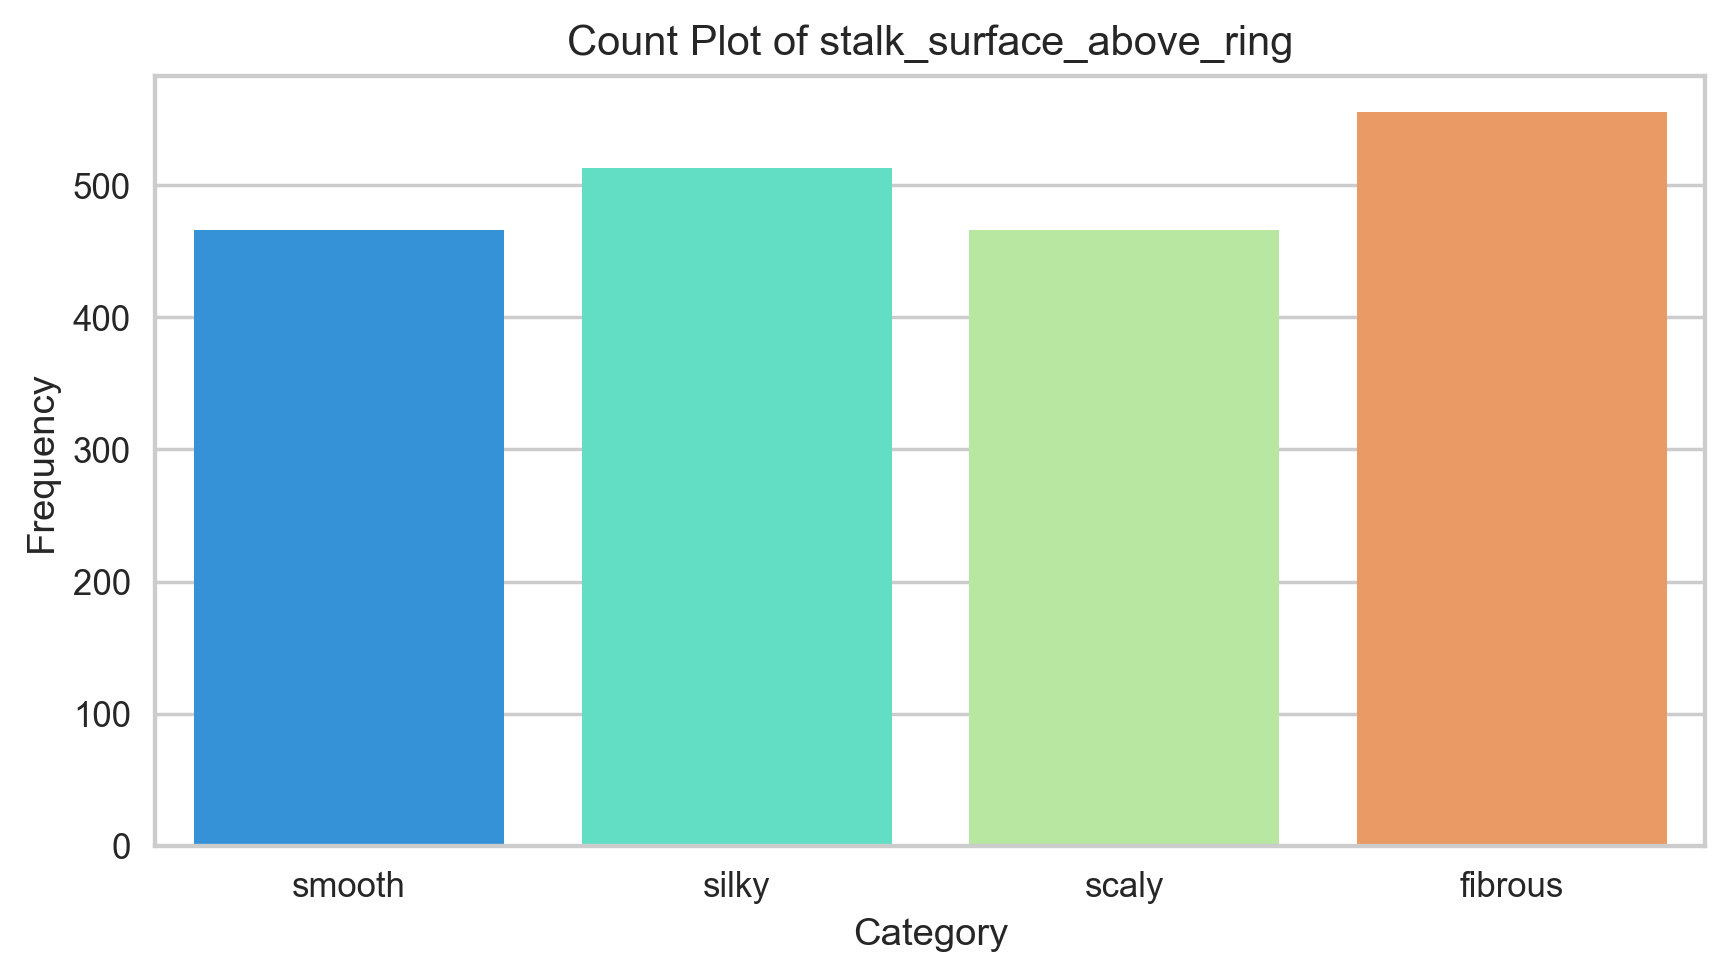

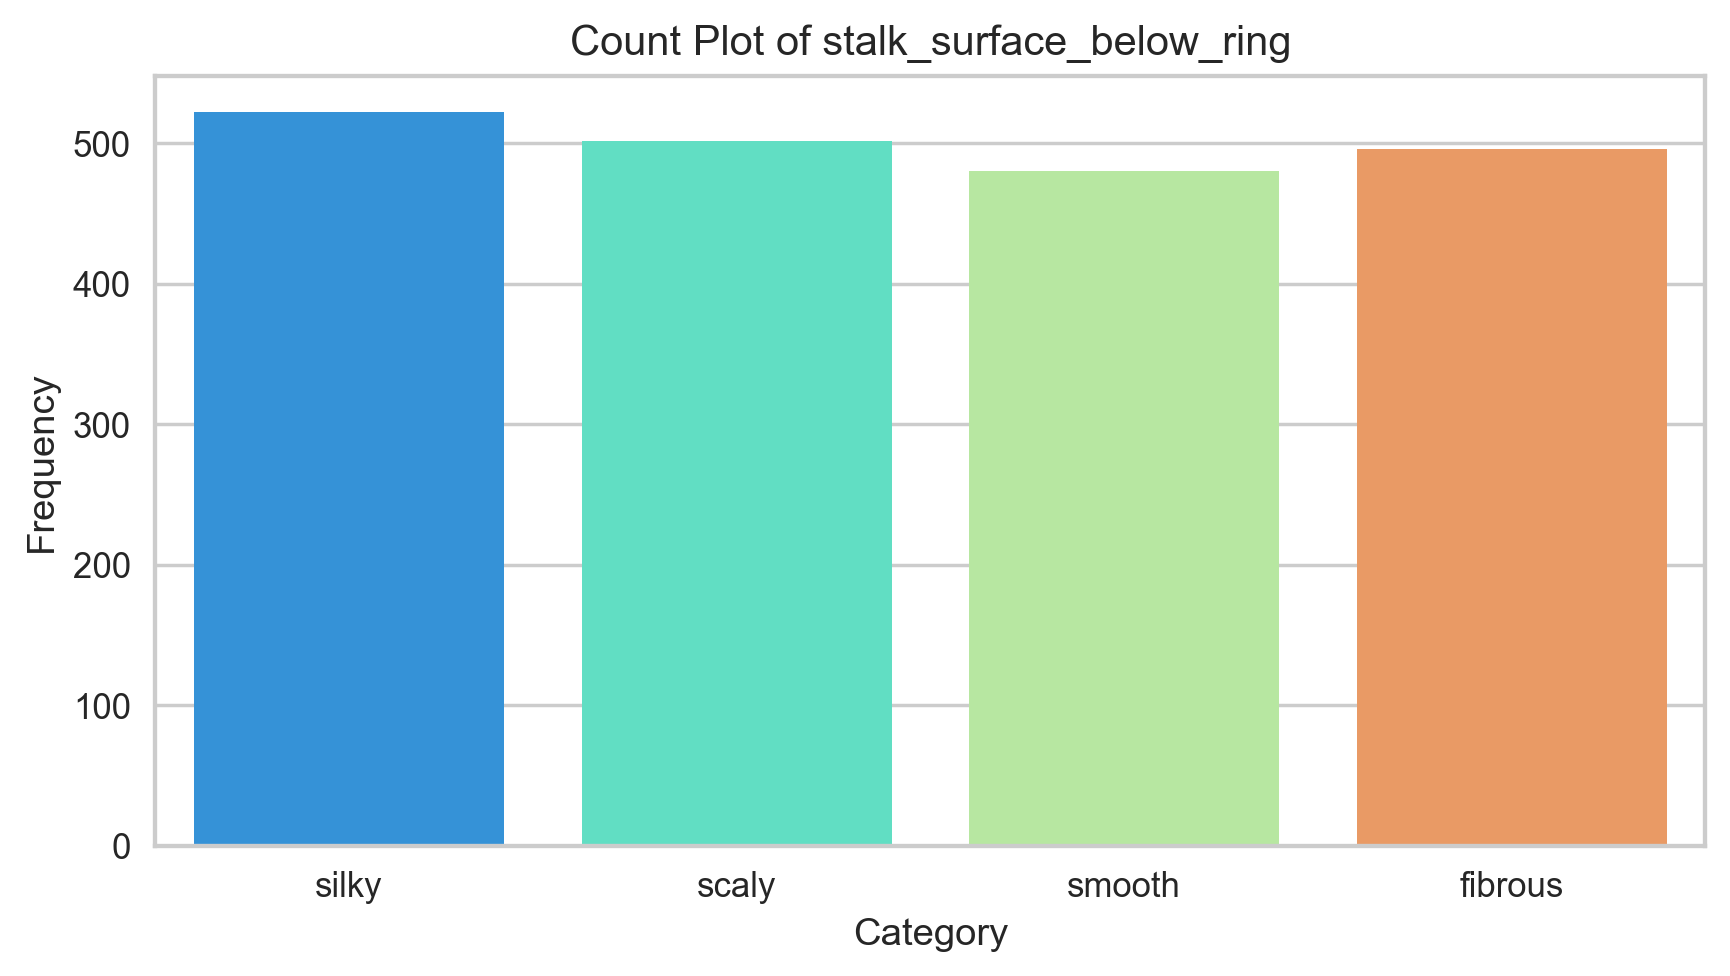

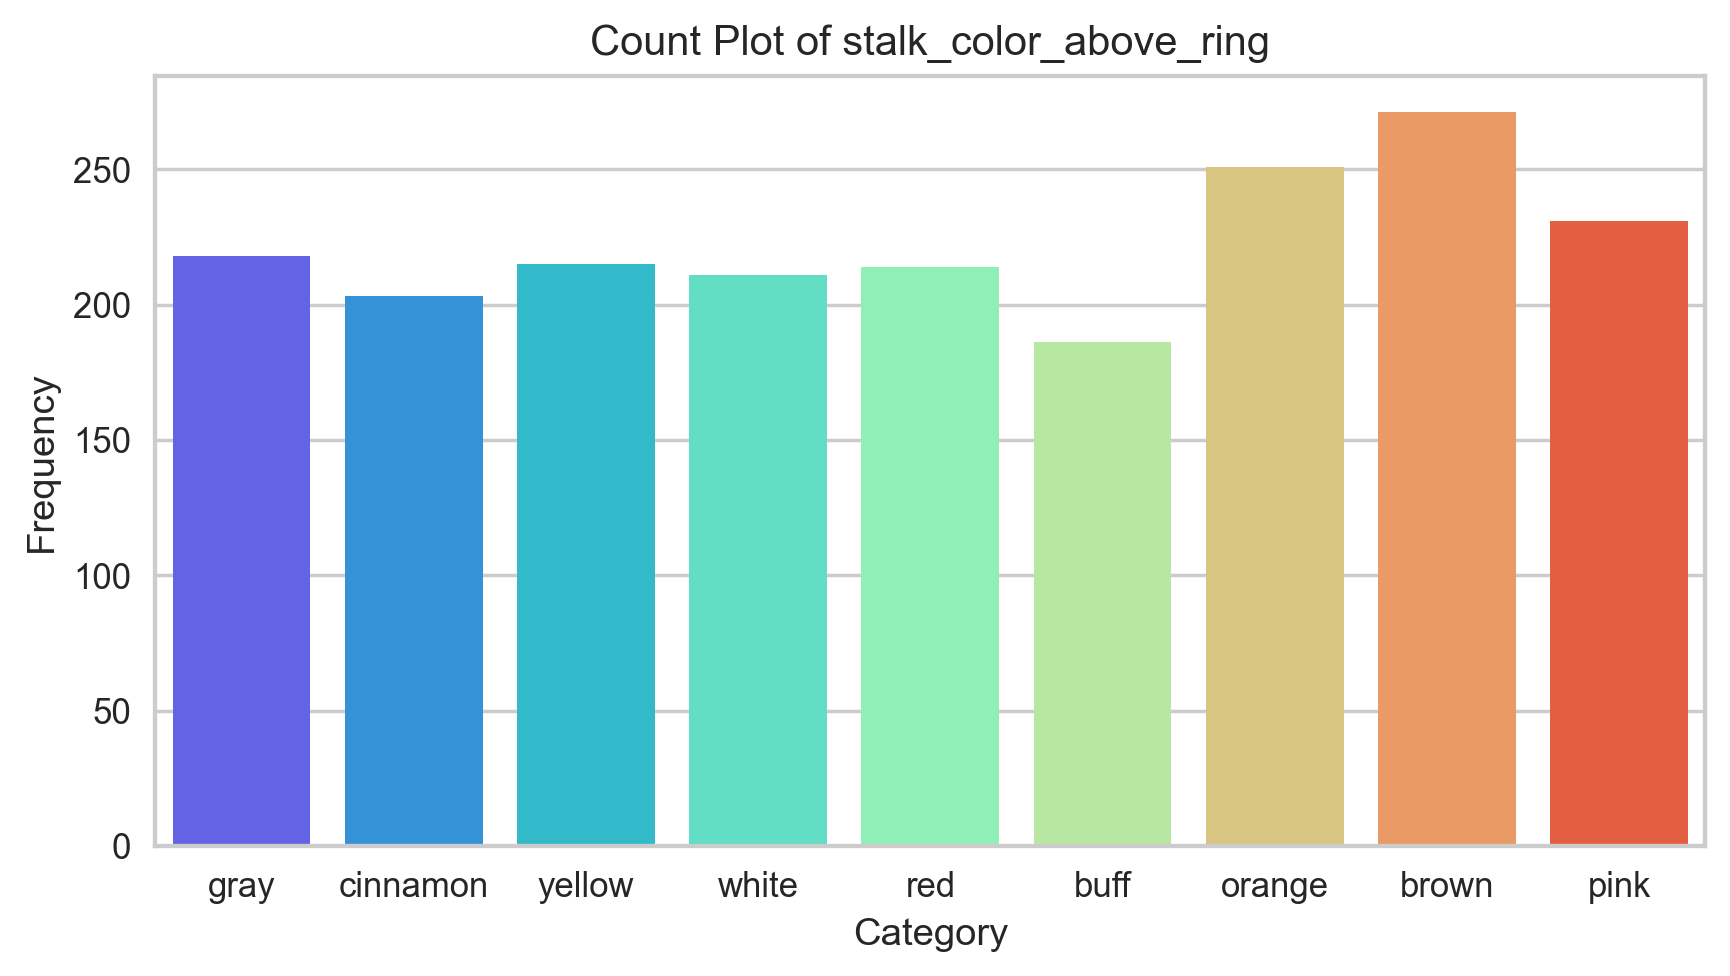

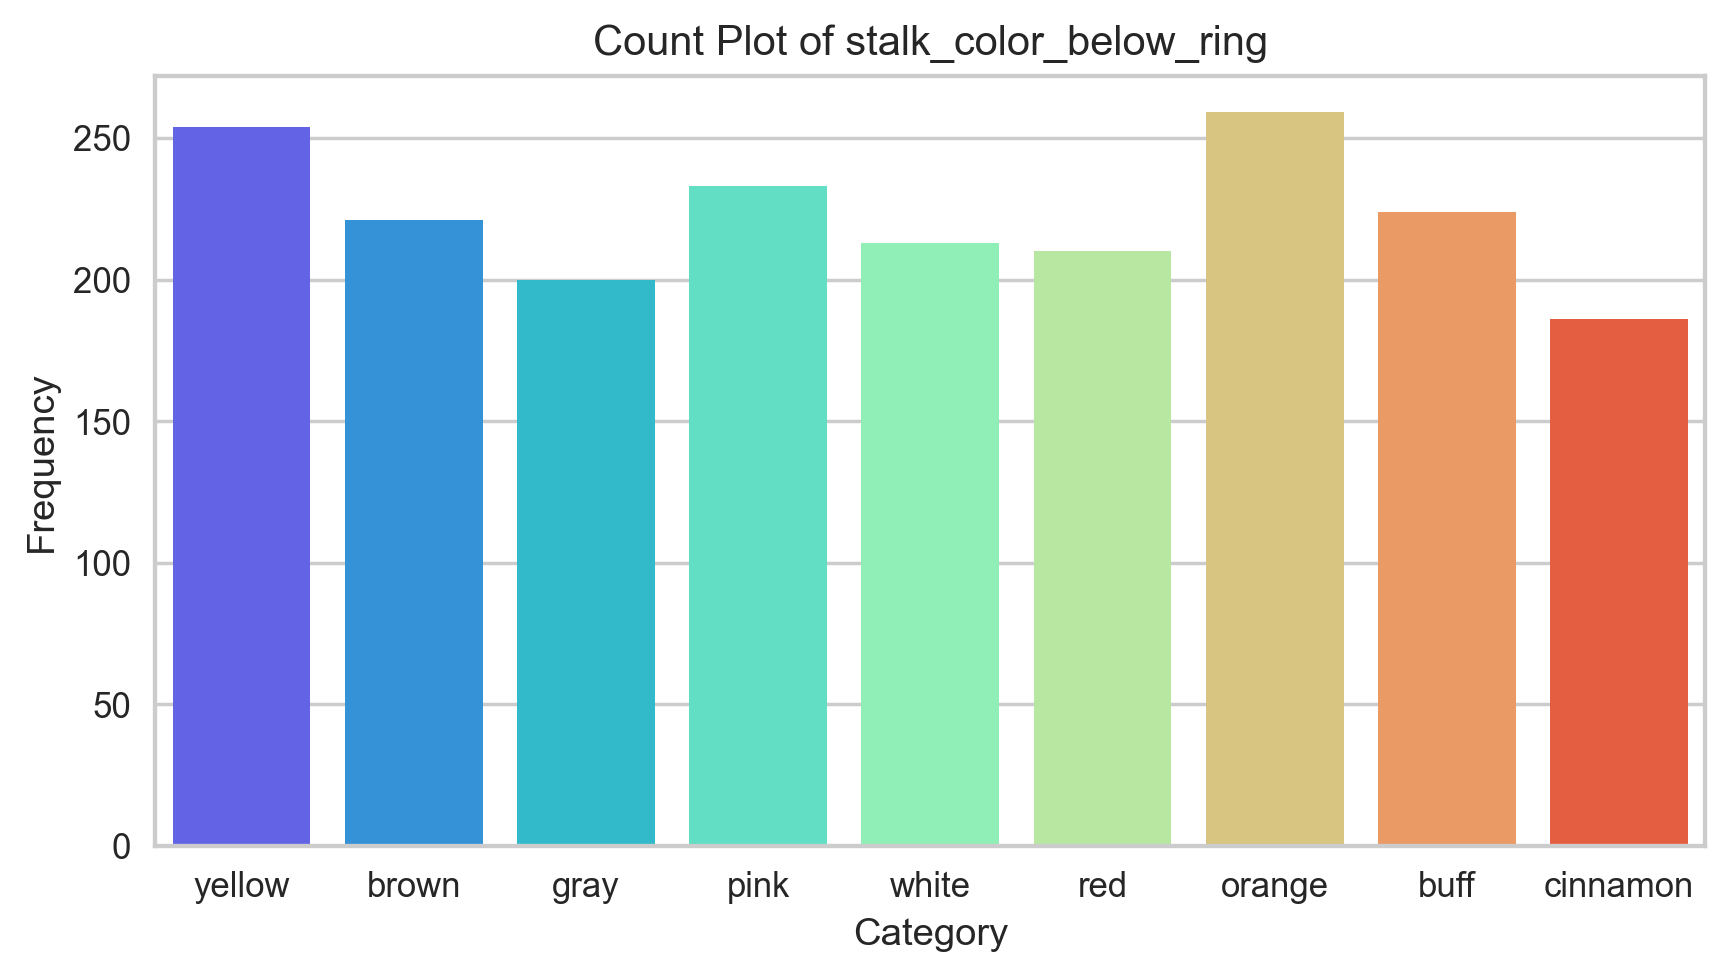

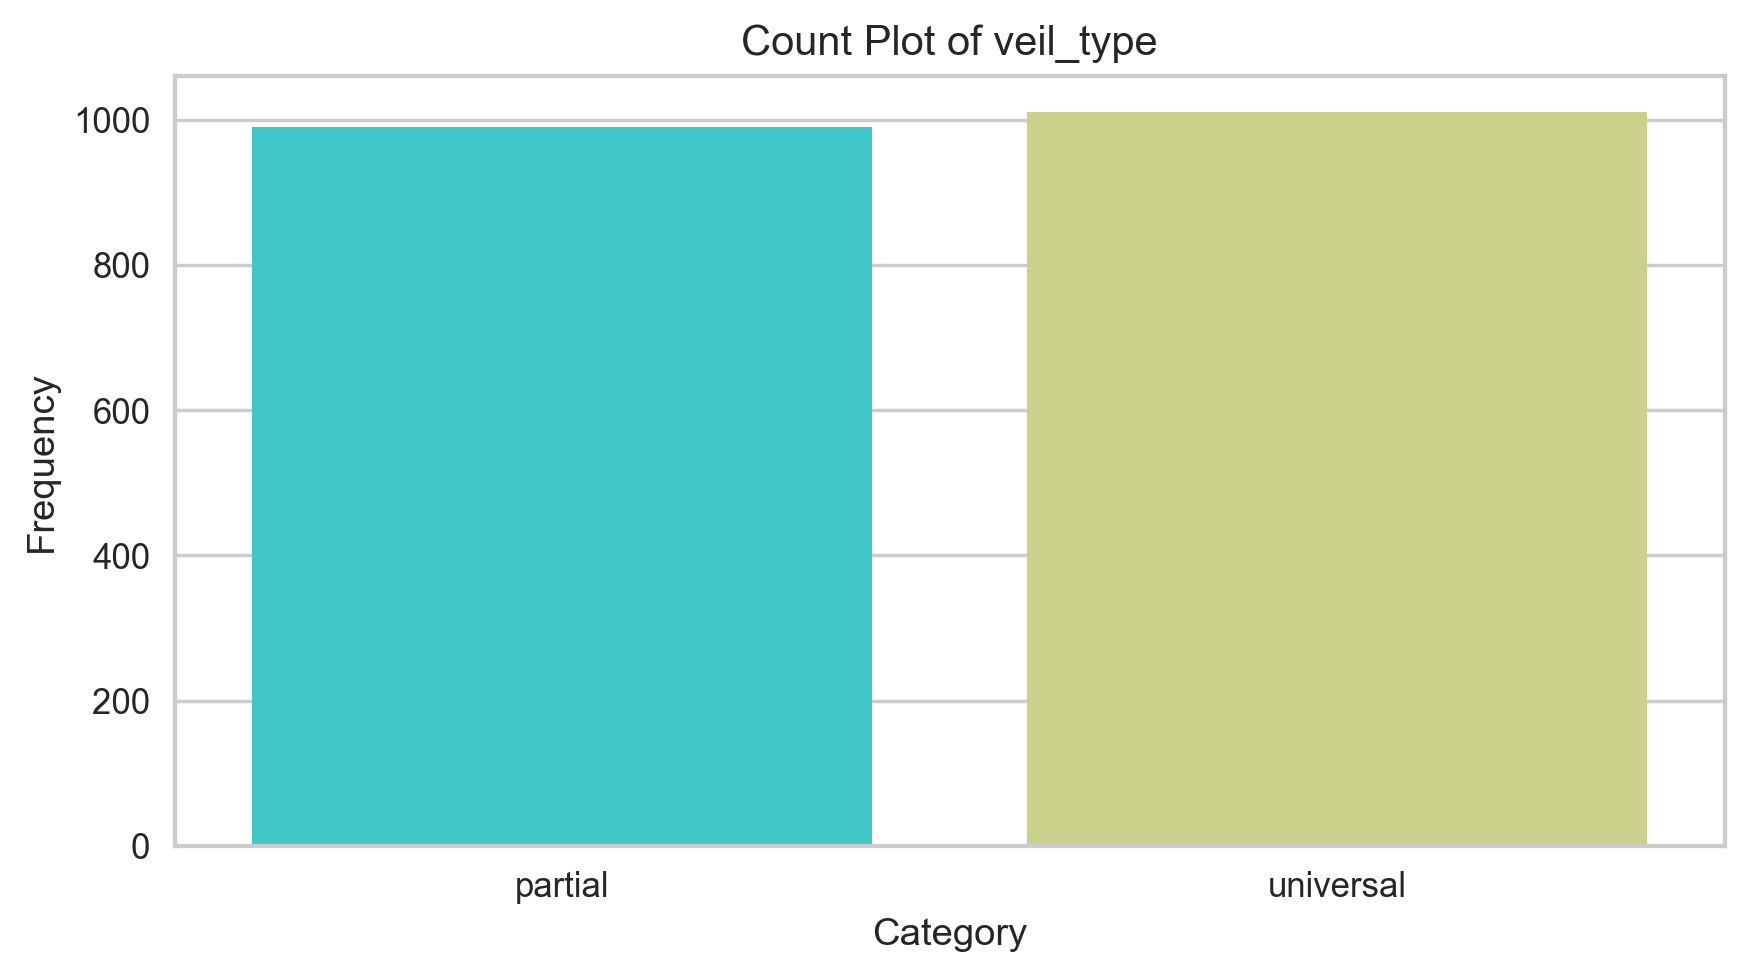

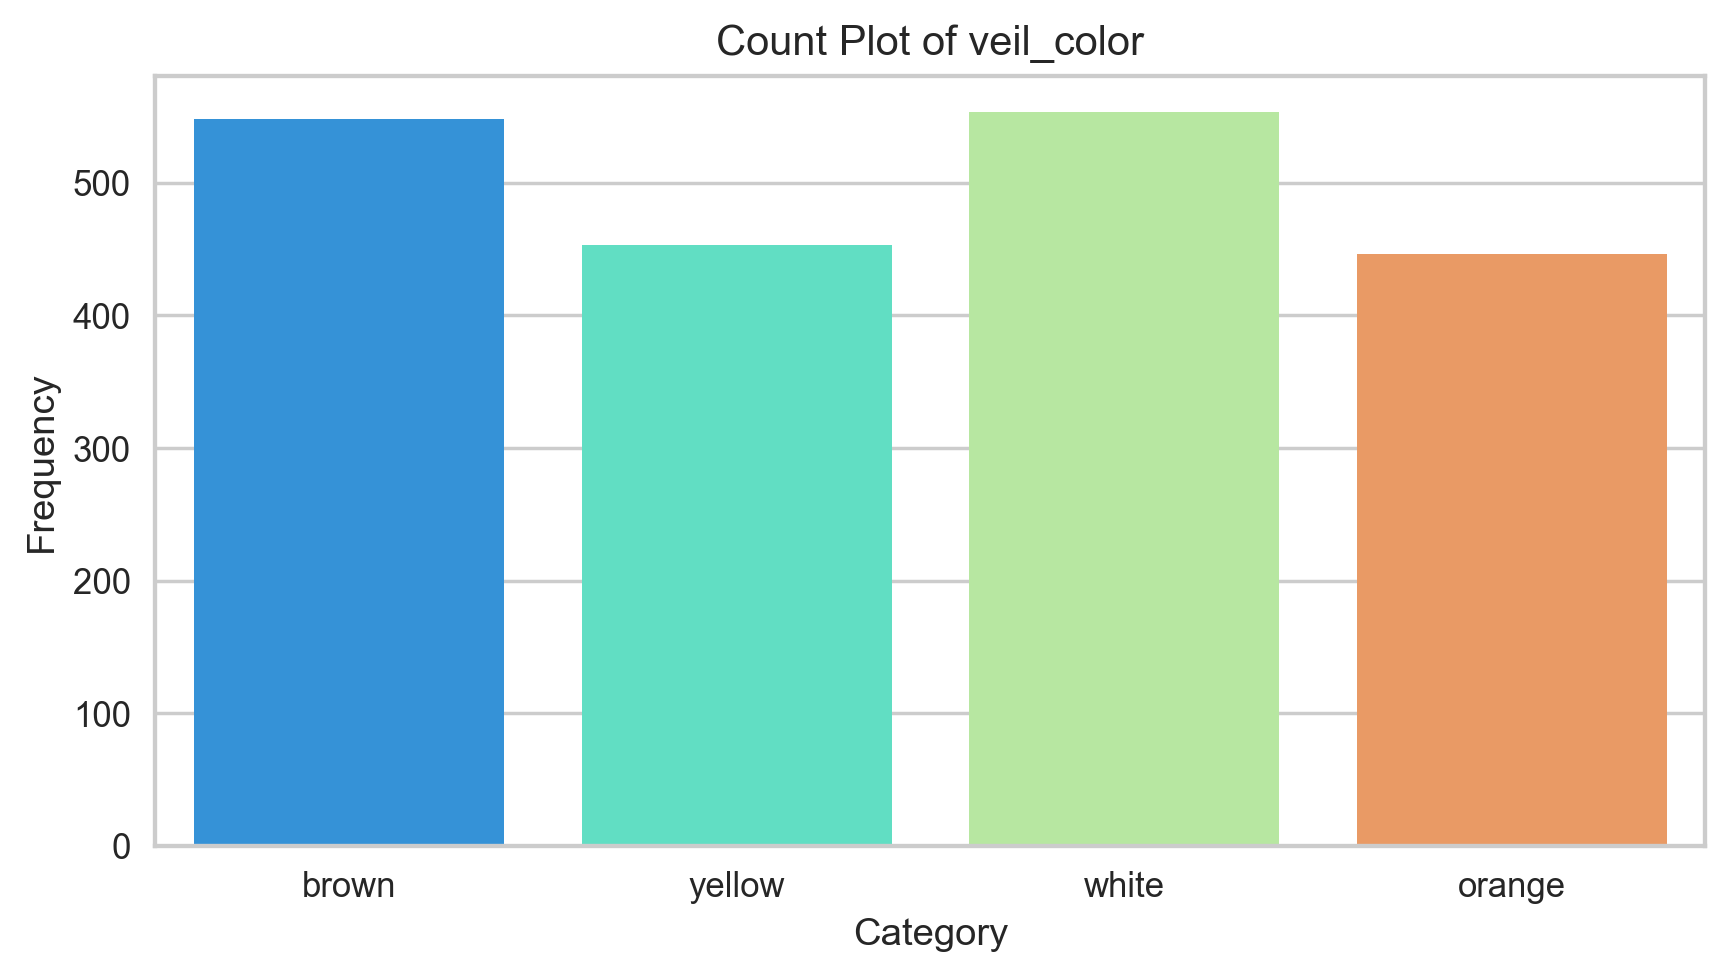

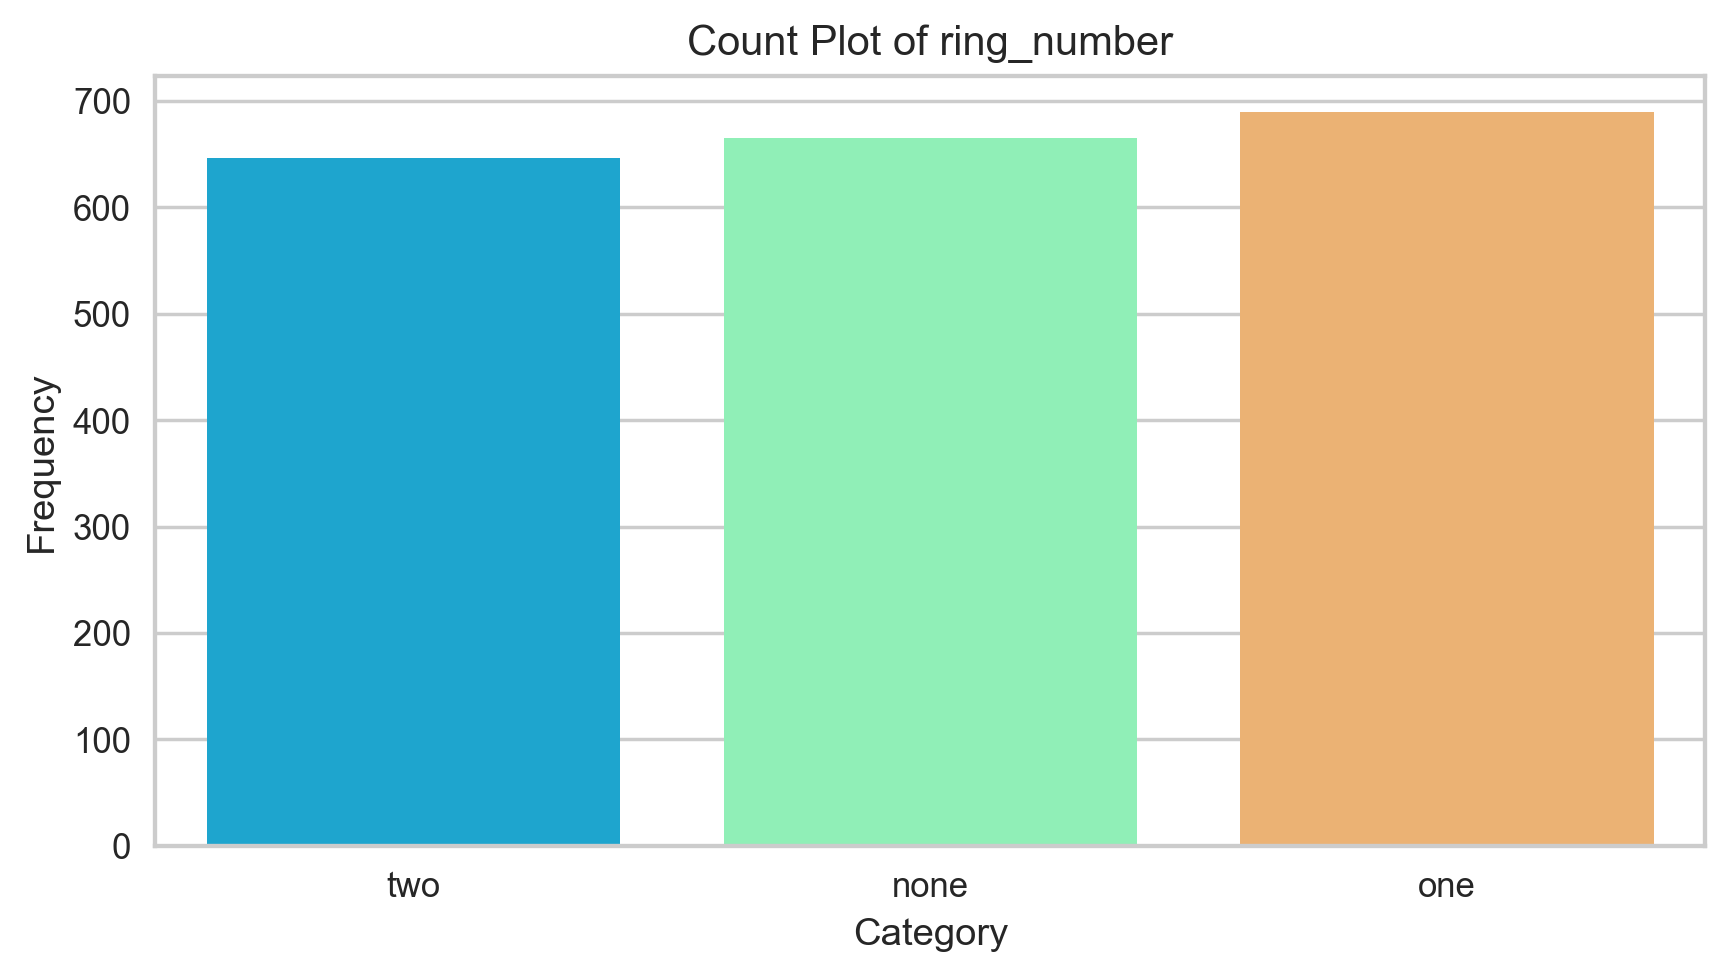

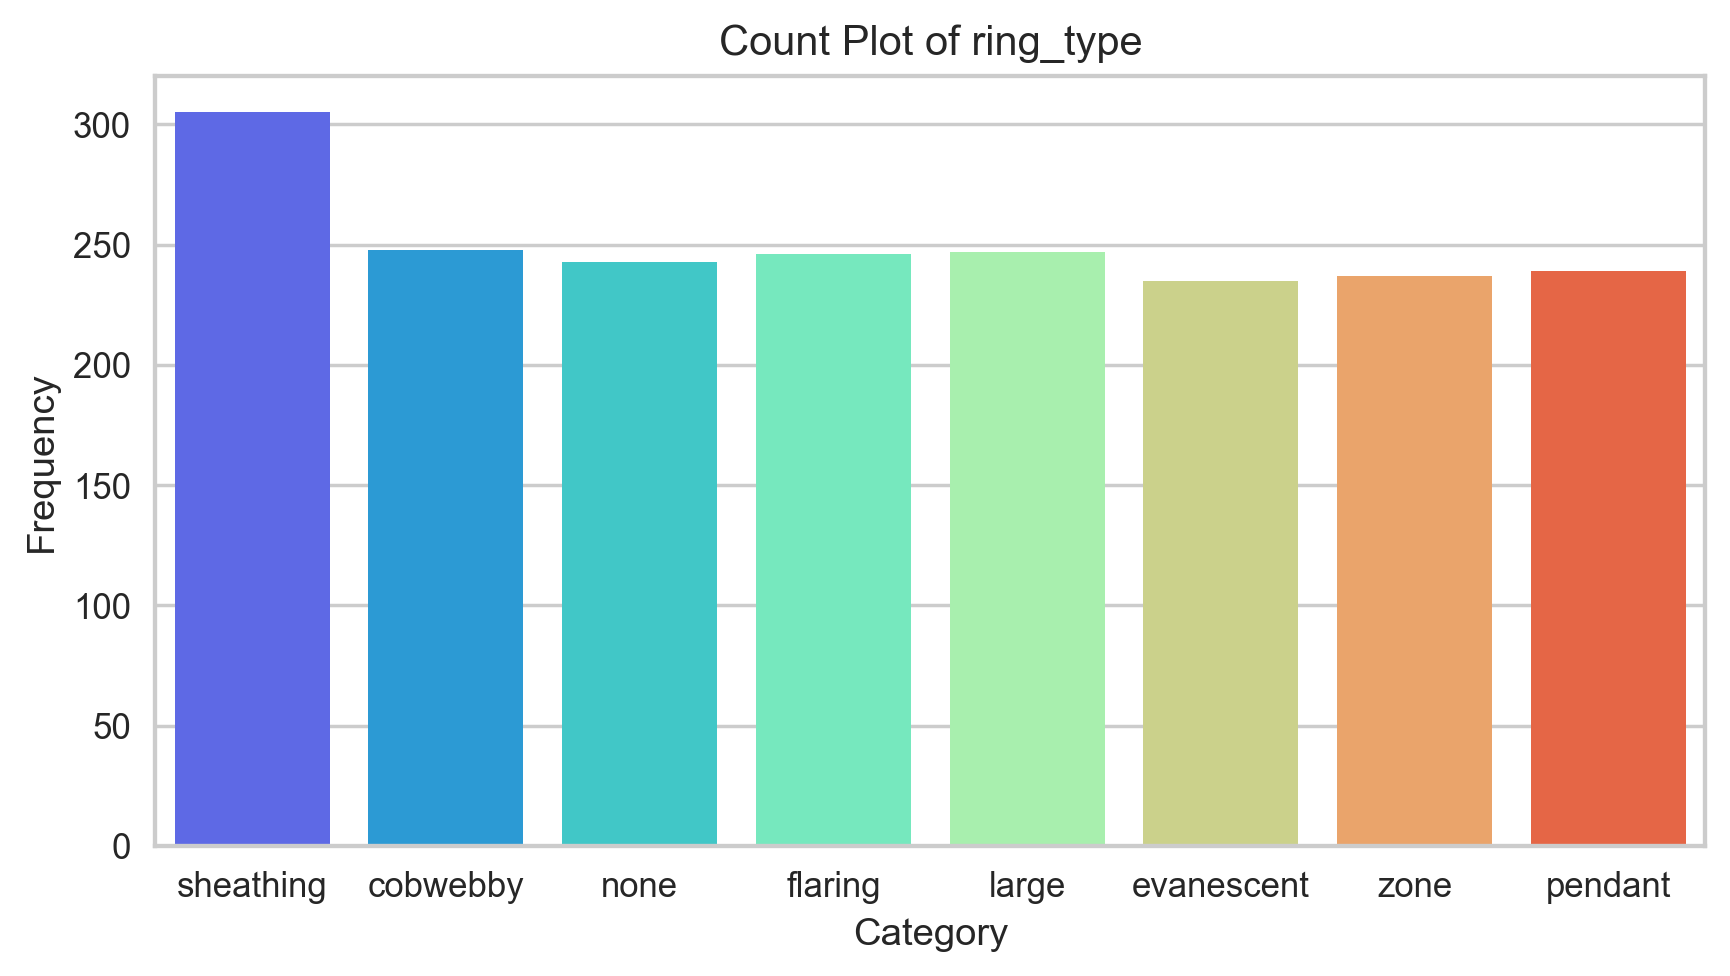

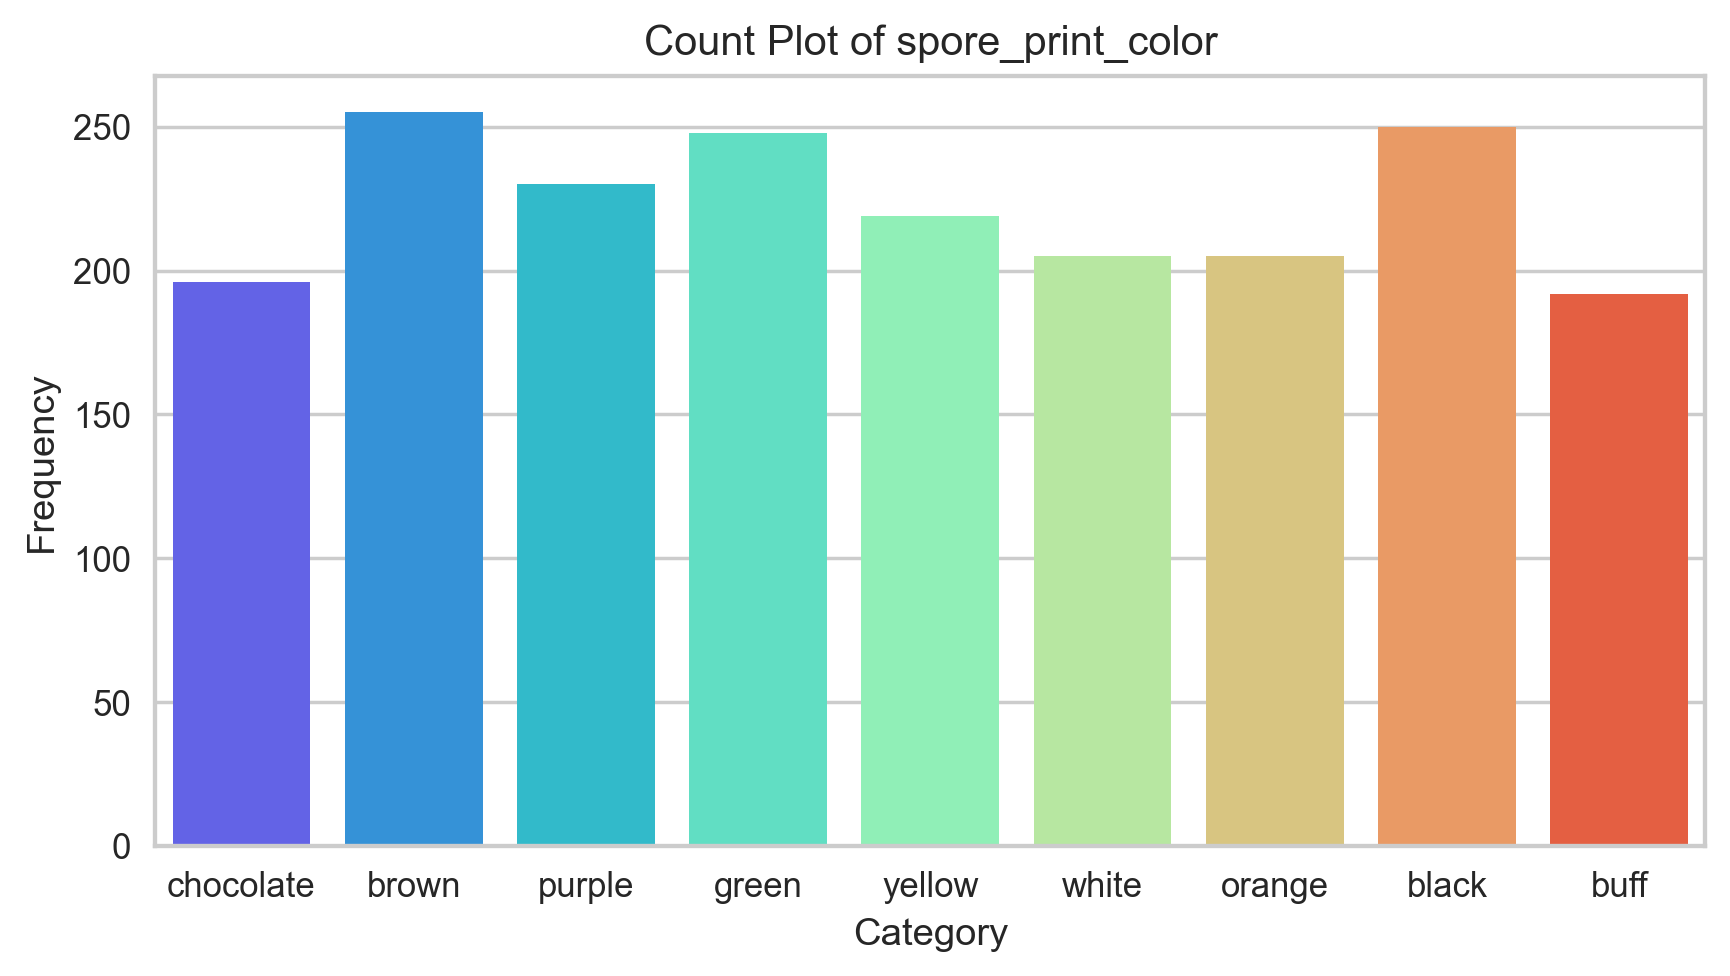

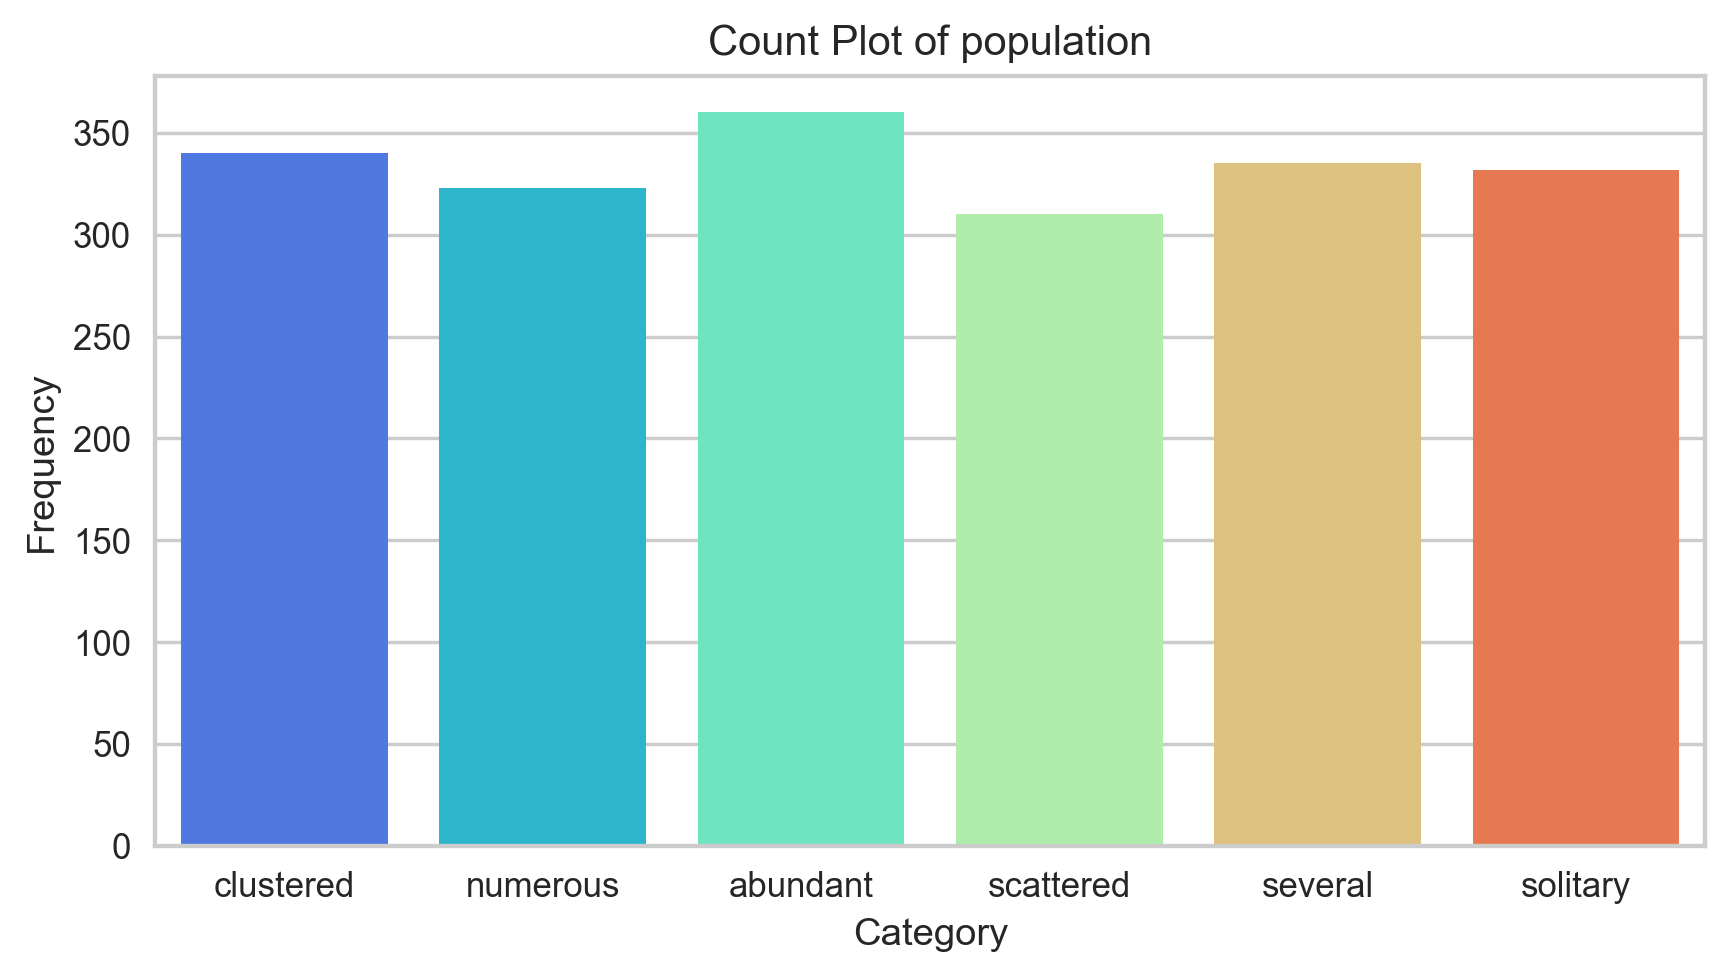

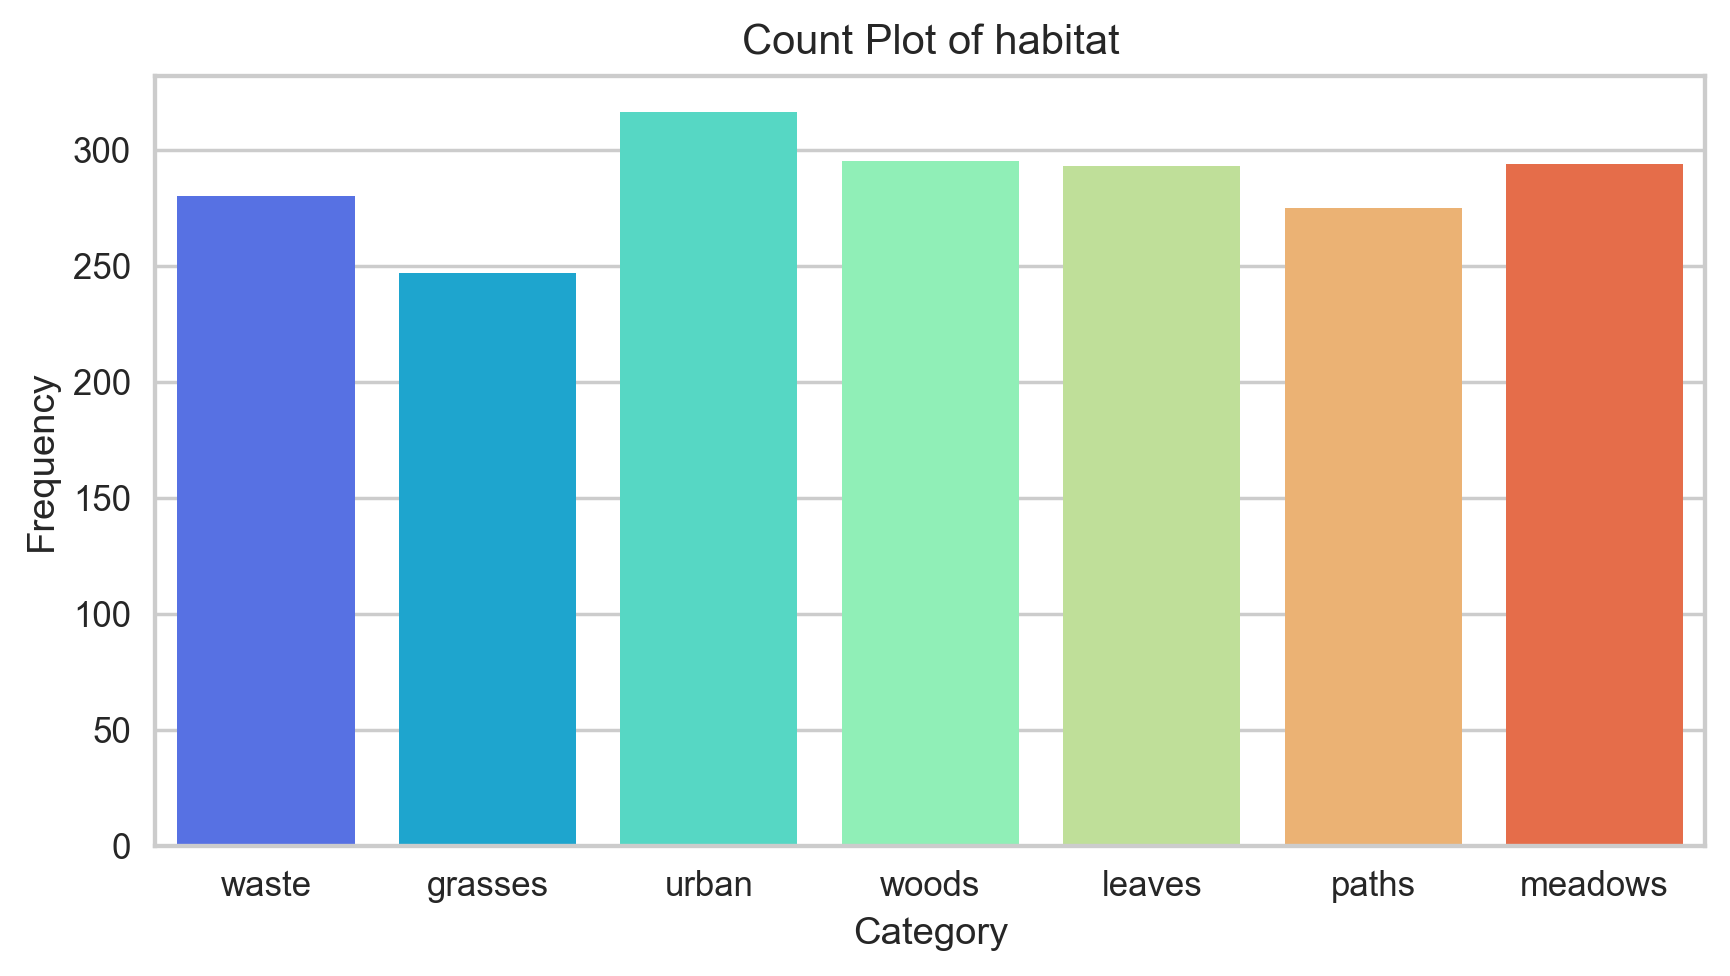

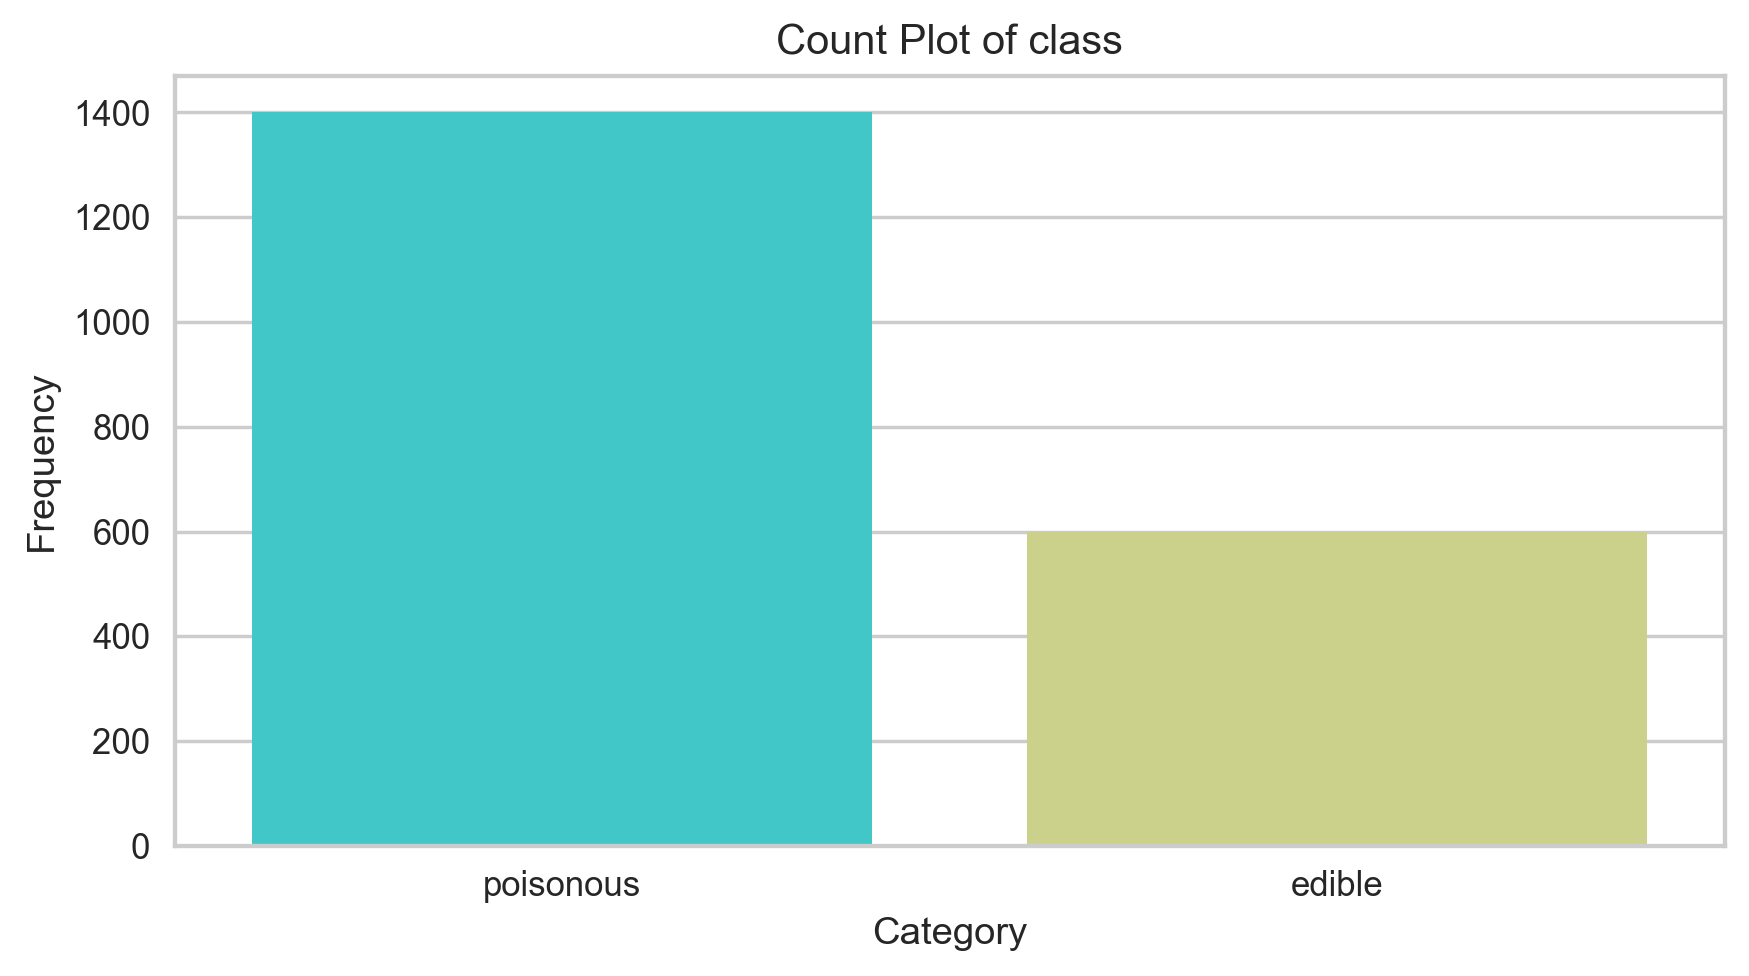

In [10]:
# Data Visualizations using seaborn countplot
for column in cat_colms.columns:
    sns.countplot(x=column, data=df, palette='rainbow')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.title(f'Count Plot of {column}')
    plt.show()

In [11]:
# Separating columns with binary unique values (nunique values <=2) for OneHotEncoding
# And columns with multiple unique values (nunique values >2) for OrdinalEncoding
binary = []
non_binary = []
for columns in cat_colms.columns:
    if df[columns].nunique() <= 2:
        binary.append(columns),
    else:
        non_binary.append(columns)
binary = pd.DataFrame(columns=binary, data = df)
non_binary = pd.DataFrame(columns=non_binary, data = df)
binary

bruises gill_size stalk_shape  veil_type      class
0         no     broad    tapering    partial  poisonous
1         no    narrow   enlarging  universal     edible
2        yes     broad    tapering  universal  poisonous
3        yes     broad   enlarging    partial  poisonous
4        yes    narrow   enlarging  universal  poisonous
...      ...       ...         ...        ...        ...
1995     yes    narrow    tapering    partial  poisonous
1996     yes    narrow    tapering    partial  poisonous
1997     yes    narrow    tapering    partial  poisonous
1998      no    narrow   enlarging  universal  poisonous
1999     yes    narrow   enlarging    partial  poisonous

[2000 rows x 5 columns]

In [12]:
non_binary

cap_shape cap_surface cap_color     odor gill_attachment gill_spacing  \
0       sunken       scaly     white    anise      descending      distant   
1       sunken     fibrous       red    anise         notched      crowded   
2         flat     grooves    purple     foul      descending      crowded   
3         bell       scaly      pink    fishy         notched        close   
4         flat      smooth    yellow    musty            free      crowded   
...        ...         ...       ...      ...             ...          ...   
1995    sunken       scaly     brown     foul        attached      crowded   
1996    sunken       scaly    purple    musty        attached      distant   
1997    convex     grooves     green    fishy         notched        close   
1998      bell      smooth     white  pungent            free        close   
1999    convex       scaly    yellow  pungent      descending        close   

     gill_color   stalk_root stalk_surface_above_ring  \
0          pink          cup                   smooth   
1     chocolate       rooted                    silky   
2        purple          cup                    scaly   
3        orange         club                   smooth   
4        orange      missing                  fibrous   
...         ...          ...                      ...   
1995  chocolate      bulbous                    silky   
1996        red  rhizomorphs                  fibrous   
1997       pink      missing                   smooth   
1998     orange       rooted                    scaly   
1999     purple         club                  fibrous   

     stalk_surface_below_ring stalk_color_above_ring stalk_color_below_ring  \
0                       silky                   gray                 yellow   
1                       silky               cinnamon                  brown   
2                       silky                 yellow                   gray   
3                       scaly                 yellow                   pink   
4                       scaly                   gray                  white   
...                       ...                    ...                    ...   
1995                    silky                   pink                 orange   
1996                  fibrous                   pink                 orange   
1997                    silky                  brown                    red   
1998                  fibrous                   gray                   pink   
1999                    scaly                   gray                  brown   

     veil_color ring_number   ring_type spore_print_color population  habitat  
0         brown         two   sheathing         chocolate  clustered    waste  
1         brown         two   sheathing             brown   numerous    waste  
2        yellow         two   sheathing            purple   abundant    waste  
3        yellow         two    cobwebby             green  clustered  grasses  
4         white        none        none            yellow  clustered    urban  
...         ...         ...         ...               ...        ...      ...  
1995     orange         one     flaring            purple   abundant   leaves  
1996      white         one        zone            yellow   numerous    waste  
1997      brown         two  evanescent            yellow   abundant    woods  
1998     yellow         one    cobwebby             brown   solitary    woods  
1999      white         two       large             white   numerous    urban  

[2000 rows x 18 columns]

In [13]:
# Applying OrdinalEncoding on non_binary dataset
oe = OrdinalEncoder()
data1 = oe.fit_transform(non_binary)
data1= pd.DataFrame(data = data1, columns=non_binary.columns)

In [14]:
# We have to drop class column i.e target column here if not done it will encode the target column also
binary = binary.drop(columns='class')

ohe = OneHotEncoder(sparse=False)
data2 = ohe.fit_transform(binary)
data2 = pd.DataFrame(data = data2, columns=ohe.get_feature_names_out(binary.columns))
data2

bruises_no  bruises_yes  gill_size_broad  gill_size_narrow  \
0            1.0          0.0              1.0               0.0   
1            1.0          0.0              0.0               1.0   
2            0.0          1.0              1.0               0.0   
3            0.0          1.0              1.0               0.0   
4            0.0          1.0              0.0               1.0   
...          ...          ...              ...               ...   
1995         0.0          1.0              0.0               1.0   
1996         0.0          1.0              0.0               1.0   
1997         0.0          1.0              0.0               1.0   
1998         1.0          0.0              0.0               1.0   
1999         0.0          1.0              0.0               1.0   

      stalk_shape_enlarging  stalk_shape_tapering  veil_type_partial  \
0                       0.0                   1.0                1.0   
1                       1.0                   0.0                0.0   
2                       0.0                   1.0                0.0   
3                       1.0                   0.0                1.0   
4                       1.0                   0.0                0.0   
...                     ...                   ...                ...   
1995                    0.0                   1.0                1.0   
1996                    0.0                   1.0                1.0   
1997                    0.0                   1.0                1.0   
1998                    1.0                   0.0                0.0   
1999                    1.0                   0.0                1.0   

      veil_type_universal  
0                     0.0  
1                     1.0  
2                     1.0  
3                     0.0  
4                     1.0  
...                   ...  
1995                  0.0  
1996                  0.0  
1997                  0.0  
1998                  1.0  
1999                  0.0  

[2000 rows x 8 columns]

In [15]:
data = pd.concat([data1, data2], axis=1, join='inner')
data

cap_shape  cap_surface  cap_color  odor  gill_attachment  gill_spacing  \
0           4.0          2.0        7.0   1.0              1.0           2.0   
1           4.0          0.0        6.0   1.0              3.0           1.0   
2           3.0          1.0        5.0   4.0              1.0           1.0   
3           0.0          2.0        4.0   3.0              3.0           0.0   
4           3.0          3.0        8.0   5.0              2.0           1.0   
...         ...          ...        ...   ...              ...           ...   
1995        4.0          2.0        0.0   4.0              0.0           1.0   
1996        4.0          2.0        5.0   5.0              0.0           2.0   
1997        2.0          1.0        3.0   3.0              3.0           0.0   
1998        0.0          3.0        7.0   7.0              2.0           0.0   
1999        2.0          2.0        8.0   7.0              1.0           0.0   

      gill_color  stalk_root  stalk_surface_above_ring  \
0            7.0         2.0                       3.0   
1            3.0         6.0                       2.0   
2            8.0         2.0                       1.0   
3            6.0         1.0                       3.0   
4            6.0         4.0                       0.0   
...          ...         ...                       ...   
1995         3.0         0.0                       2.0   
1996         9.0         5.0                       0.0   
1997         7.0         4.0                       3.0   
1998         6.0         6.0                       1.0   
1999         8.0         1.0                       0.0   

      stalk_surface_below_ring  ...  population  habitat  bruises_no  \
0                          2.0  ...         1.0      5.0         1.0   
1                          2.0  ...         2.0      5.0         1.0   
2                          2.0  ...         0.0      5.0         0.0   
3                          1.0  ...         1.0      0.0         0.0   
4                          1.0  ...         1.0      4.0         0.0   
...                        ...  ...         ...      ...         ...   
1995                       2.0  ...         0.0      1.0         0.0   
1996                       0.0  ...         2.0      5.0         0.0   
1997                       2.0  ...         0.0      6.0         0.0   
1998                       0.0  ...         5.0      6.0         1.0   
1999                       1.0  ...         2.0      4.0         0.0   

      bruises_yes  gill_size_broad  gill_size_narrow  stalk_shape_enlarging  \
0             0.0              1.0               0.0                    0.0   
1             0.0              0.0               1.0                    1.0   
2             1.0              1.0               0.0                    0.0   
3             1.0              1.0               0.0                    1.0   
4             1.0              0.0               1.0                    1.0   
...           ...              ...               ...                    ...   
1995          1.0              0.0               1.0                    0.0   
1996          1.0              0.0               1.0                    0.0   
1997          1.0              0.0               1.0                    0.0   
1998          0.0              0.0               1.0                    1.0   
1999          1.0              0.0               1.0                    1.0   

      stalk_shape_tapering  veil_type_partial  veil_type_universal  
0                      1.0                1.0                  0.0  
1                      0.0                0.0                  1.0  
2                      1.0                0.0                  1.0  
3                      0.0                1.0                  0.0  
4                      0.0                0.0                  1.0  
...                    ...                ...                  ...  
1995                   1.0                1.0      

In [16]:
# It will transform Poisonus = 1 & edible = 0
le = LabelEncoder()
data['class'] = pd.DataFrame(le.fit_transform(df['class']))
data['class']

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [17]:
# Checking for coreelations 
data.corr()

cap_shape  cap_surface  cap_color      odor  \
cap_shape                  1.000000    -0.003244   0.009615 -0.030119   
cap_surface               -0.003244     1.000000   0.003153 -0.021926   
cap_color                  0.009615     0.003153   1.000000 -0.065410   
odor                      -0.030119    -0.021926  -0.065410  1.000000   
gill_attachment            0.015477    -0.010513   0.023835 -0.055214   
gill_spacing              -0.048783     0.068918  -0.015628 -0.002847   
gill_color                 0.032123     0.045561  -0.005898 -0.051793   
stalk_root                 0.057405    -0.008284  -0.004423 -0.005430   
stalk_surface_above_ring  -0.030537     0.016799  -0.019983  0.063281   
stalk_surface_below_ring  -0.000870    -0.000493   0.000528  0.005568   
stalk_color_above_ring    -0.021350    -0.048534   0.038920 -0.006393   
stalk_color_below_ring     0.027522    -0.011742   0.036951 -0.007103   
veil_color                -0.017399     0.040341  -0.036166  0.015397   
ring_number                0.036999     0.005855   0.055593 -0.068819   
ring_type                  0.010172     0.017616   0.021509  0.033956   
spore_print_color          0.024596    -0.042134   0.082155 -0.057705   
population                 0.003602    -0.003963  -0.027551 -0.011753   
habitat                    0.028388    -0.038661  -0.025568 -0.051237   
bruises_no                 0.001190     0.021352  -0.016445 -0.026274   
bruises_yes               -0.001190    -0.021352   0.016445  0.026274   
gill_size_broad           -0.040497     0.038490  -0.009888  0.027313   
gill_size_narrow           0.040497    -0.038490   0.009888 -0.027313   
stalk_shape_enlarging     -0.011573     0.024032   0.020397 -0.009072   
stalk_shape_tapering       0.011573    -0.024032  -0.020397  0.009072   
veil_type_partial          0.039029     0.068705   0.020039 -0.028177   
veil_type_universal       -0.039029    -0.068705  -0.020039  0.028177   
class                      0.001140    -0.046409  -0.078029  0.039536   

                          gill_attachment  gill_spacing  gill_color  \
cap_shape                        0.015477     -0.048783    0.032123   
cap_surface                     -0.010513      0.068918    0.045561   
cap_color                        0.023835     -0.015628   -0.005898   
odor                            -0.055214     -0.002847   -0.051793   
gill_attachment                  1.000000     -0.063604    0.035279   
gill_spacing                    -0.063604      1.000000   -0.010729   
gill_color                       0.035279     -0.010729    1.000000   
stalk_root                      -0.013484      0.000668    0.021247   
stalk_surface_above_ring        -0.021187     -0.031336   -0.055272   
stalk_surface_below_ring        -0.009479     -0.043794    0.004781   
stalk_color_above_ring           0.011811     -0.045491    0.076840   
stalk_color_below_ring           0.007839      0.003012    0.050684   
veil_color                      -0.023648      0.004960   -0.026018   
ring_number                      0.080437      0.024984   -0.029421   
ring_type                       -0.006025      0.001516    0.058992   
spore_print_color                0.039356      0.016376    0.037690   
population                      -0.002649     -0.004920    0.034533   
habitat                          0.005944      0.004055    0.018815   
bruises_no                      -0.009402      0.004458    0.035135   
bruises_yes                      0.009402     -0.004458   -0.035135   
gill_size_broad                 -0.009386      0.022650    0.054736   
gill_size_narrow                 0.009386     -0.022650   -0.054736   
stalk_shape_enlarging            0.018698     -0.051041    0.056446   
stalk_shape_tapering            -0.018698      0.051041   -0.056446   
veil_type_partial                0.042727      0.016567    0.029070   
veil_type_universal             -0.042727     -0.016567   -0.029070   
class                           -0.028194      0.046505   -0.028

<Axes: >

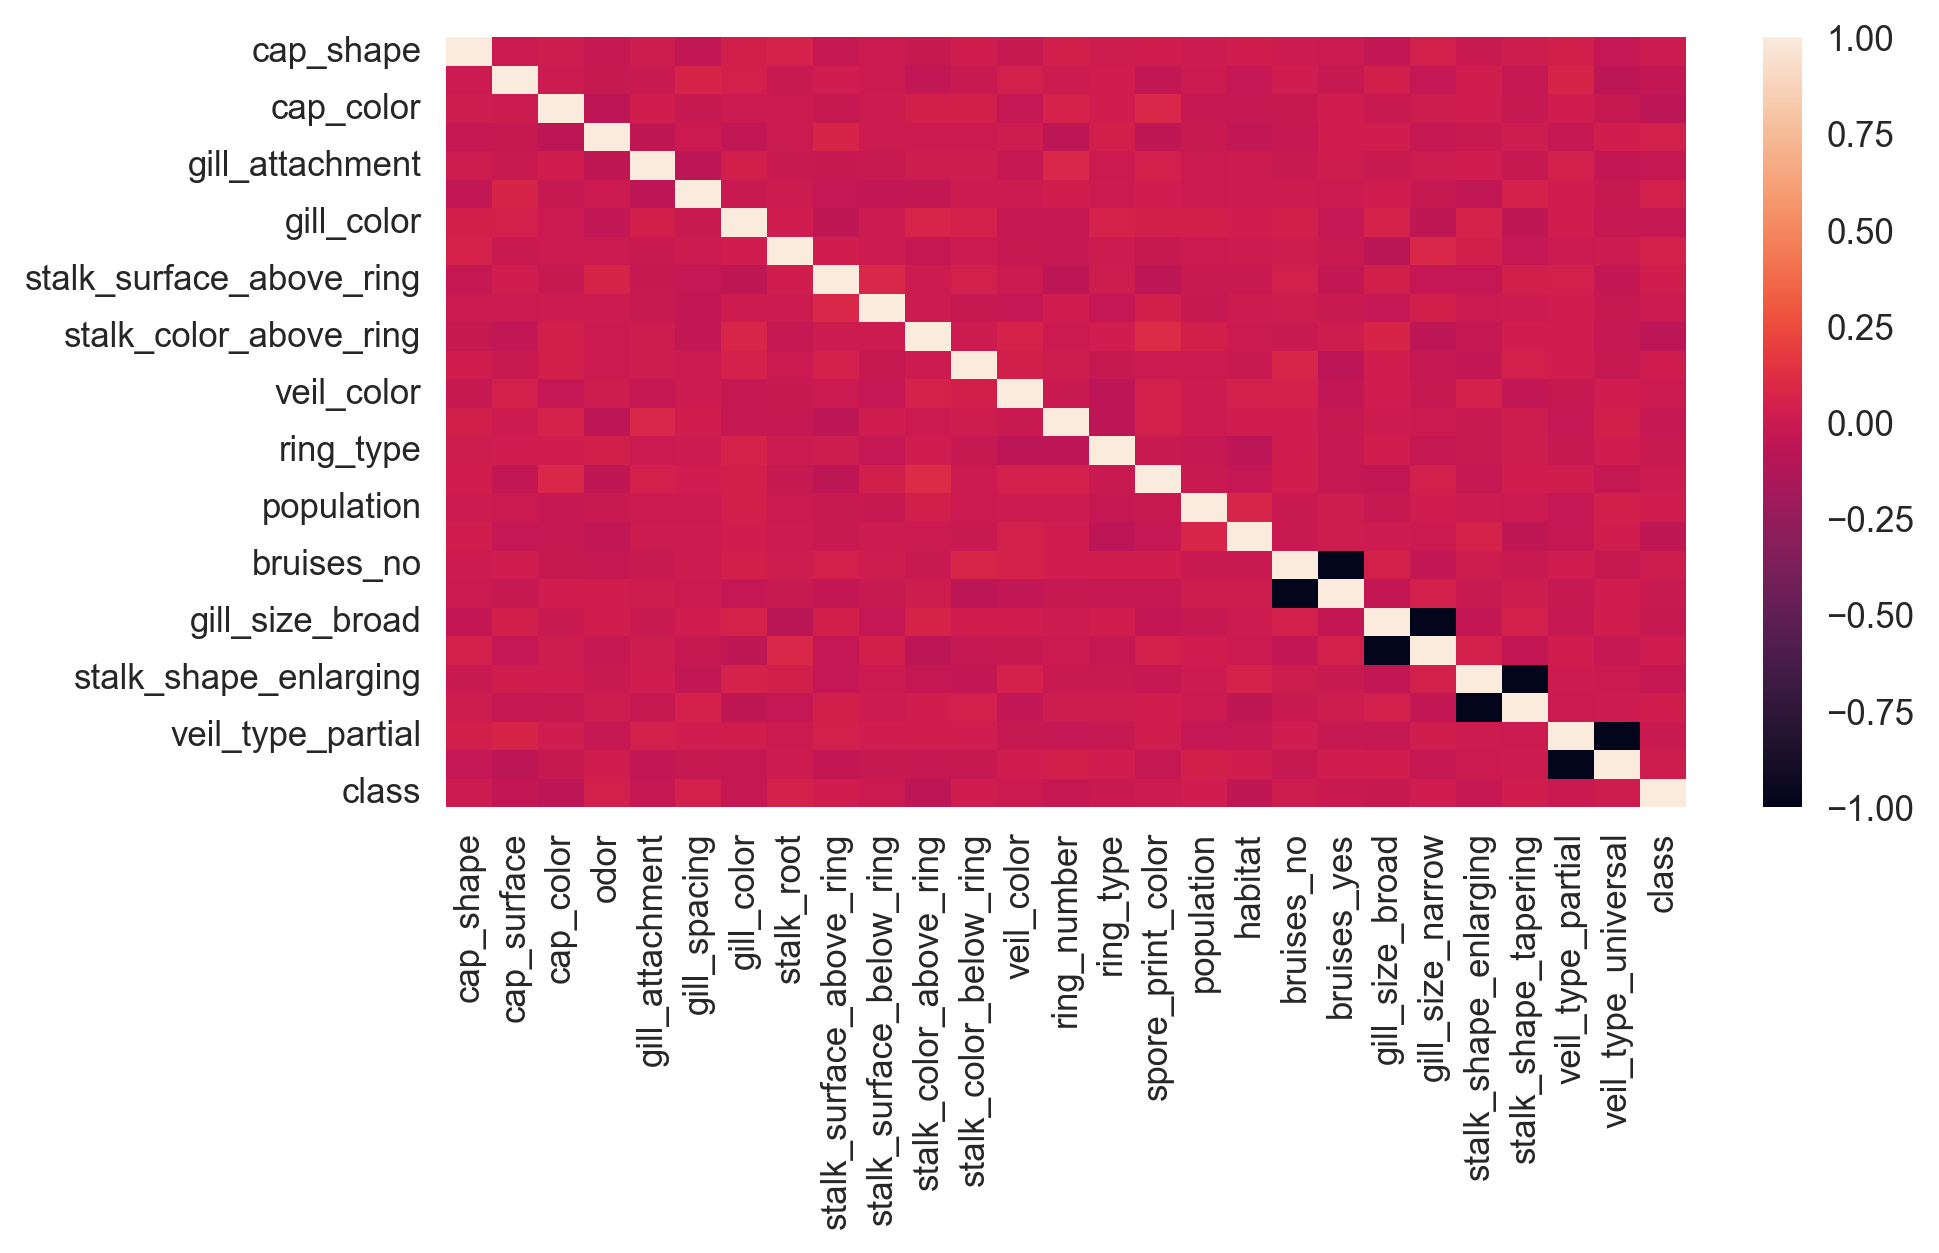

In [18]:
# Visualizing correlations
sns.heatmap(data.corr())

In [19]:
# Splitting features and labels
X = data.drop(columns='class')
y = data['class']

In [20]:
sc = StandardScaler()
x = sc.fit_transform(X)
x = pd.DataFrame(x, columns=X.columns)
x

cap_shape  cap_surface  cap_color      odor  gill_attachment  \
0      1.356643     0.398424   1.194966 -1.175776        -0.498601   
1      1.356643    -1.396280   0.814161 -1.175776         1.277359   
2      0.660035    -0.498928   0.433356  0.004524        -0.498601   
3     -1.429786     0.398424   0.052551 -0.388909         1.277359   
4      0.660035     1.295777   1.575772  0.397958         0.389379   
...         ...          ...        ...       ...              ...   
1995   1.356643     0.398424  -1.470669  0.004524        -1.386580   
1996   1.356643     0.398424   0.433356  0.397958        -1.386580   
1997  -0.036572    -0.498928  -0.328254 -0.388909         1.277359   
1998  -1.429786     1.295777   1.194966  1.184825         0.389379   
1999  -0.036572     0.398424   1.575772  1.184825        -0.498601   

      gill_spacing  gill_color  stalk_root  stalk_surface_above_ring  \
0         1.213339    0.487617   -0.409440                  1.380941   
1        -0.007938   -0.693054    1.564953                  0.492876   
2        -0.007938    0.782785   -0.409440                 -0.395189   
3        -1.229216    0.192449   -0.903038                  1.380941   
4        -0.007938    0.192449    0.577757                 -1.283254   
...            ...         ...         ...                       ...   
1995     -0.007938   -0.693054   -1.396636                  0.492876   
1996      1.213339    1.077953    1.071355                 -1.283254   
1997     -1.229216    0.487617    0.577757                  1.380941   
1998     -1.229216    0.192449    1.564953                 -0.395189   
1999     -1.229216    0.782785   -0.903038                 -1.283254   

      stalk_surface_below_ring  ...  population   habitat  bruises_no  \
0                     0.457901  ...   -0.841884  0.979166    1.023271   
1                     0.457901  ...   -0.264460  0.979166    1.023271   
2                     0.457901  ...   -1.419308  0.979166   -0.977259   
3                    -0.445257  ...   -0.841884 -1.557533   -0.977259   
4                    -0.445257  ...   -0.841884  0.471826   -0.977259   
...                        ...  ...         ...       ...         ...   
1995                  0.457901  ...   -1.419308 -1.050193   -0.977259   
1996                 -1.348414  ...   -0.264460  0.979166   -0.977259   
1997                  0.457901  ...   -1.419308  1.486505   -0.977259   
1998                 -1.348414  ...    1.467811  1.486505    1.023271   
1999                 -0.445257  ...   -0.264460  0.471826   -0.977259   

      bruises_yes  gill_size_broad  gill_size_narrow  stalk_shape_enlarging  \
0       -1.023271         1.007025         -1.007025              -1.040833   
1       -1.023271        -0.993024          0.993024               0.960769   
2        0.977259         1.007025         -1.007025              -1.040833   
3        0.977259         1.007025         -1.007025               0.960769   
4        0.977259        -0.993024          0.993024               0.960769   
...           ...              ...               ...                    ...   
1995     0.977259        -0.993024          0.993024              -1.040833   
1996     0.977259        -0.993024          0.993024              -1.040833   
1997     0.977259        -0.993024          0.993024              -1.040833   
1998    -1.023271        -0.993024          0.993024               0.960769   
1999     0.977259        -0.993024          0.993024               0.960769   

      stalk_shape_tapering  veil_type_partial  veil_type_universal  
0                 1.040833           1.010051            -1.010051  
1                -0.960769          -0.990050             0.990050  
2                 1.040833          -0.990050             0.990050  
3                -0.960769           1.010051            -1.010051  
4                -0.960769          -0.990050             0.990050  
...                    ...                ...               

In [21]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [22]:
# Splitting dataset for training and testing 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Basic SVC model building.
svc = SVC()
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(f'Training Accuracy = {svc.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {svc.score(xtest, ytest)}')
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

Training Accuracy = 0.8625
Testing Accuracy = 0.7475
              precision    recall  f1-score   support

           0       0.85      0.29      0.44       133
           1       0.73      0.97      0.84       267

    accuracy                           0.75       400
   macro avg       0.79      0.63      0.64       400
weighted avg       0.77      0.75      0.70       400

[[ 39  94]
 [  7 260]]


In [24]:
# Model Looks like Overfitted

In [25]:
# Hyperparameter tunning using Kernel Trick and GridSearhCV

In [26]:
param = {
    'kernel' : ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVC(), param_grid = param, verbose = 1)
grid.fit(xtrain, ytrain)
grid.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


{'kernel': 'poly'}

In [27]:
# Creating final model with ideal parameters
svc = SVC(kernel='poly')
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(f'Training Accuracy = {svc.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {svc.score(xtest, ytest)}')
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

Training Accuracy = 0.919375
Testing Accuracy = 0.795
              precision    recall  f1-score   support

           0       0.83      0.48      0.61       133
           1       0.79      0.95      0.86       267

    accuracy                           0.80       400
   macro avg       0.81      0.72      0.74       400
weighted avg       0.80      0.80      0.78       400

[[ 64  69]
 [ 13 254]]


In [28]:
svc = SVC(kernel='linear')
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(f'Training Accuracy = {svc.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {svc.score(xtest, ytest)}')
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

Training Accuracy = 0.708125
Testing Accuracy = 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

[[  0 133]
 [  0 267]]


In [29]:
# This final model was only able to increase training accuracy and little bit of testing accuracy.

In [30]:
# PCA for dimensionality reduction

In [31]:
pca = PCA()
pcs = pca.fit_transform(x)
pd.DataFrame(pcs, columns=x.columns)

cap_shape  cap_surface  cap_color      odor  gill_attachment  \
0     -2.291807    -1.853816   1.359405  0.101269        -0.664445   
1      1.391892    -0.189621  -2.010362  1.785861        -0.532763   
2     -1.636336     2.123529   0.302336 -0.611613        -1.741862   
3      0.101744    -0.681569   0.213436 -2.878808        -0.898716   
4      2.115840     1.171105  -1.040529  0.026732        -1.049387   
...         ...          ...        ...       ...              ...   
1995   0.871953     0.256753   2.886306  0.370386         0.651828   
1996   1.066287     0.192366   2.423208  0.276843        -0.973118   
1997   1.302457     0.079549   2.619022  0.536747        -1.005836   
1998   1.137893    -0.310858  -2.571759  1.332326         0.322479   
1999   2.663970    -0.289884   0.389018 -1.094931        -1.297027   

      gill_spacing  gill_color  stalk_root  stalk_surface_above_ring  \
0        -0.086344   -1.203317   -1.833903                  0.558157   
1        -0.494388   -0.621232   -3.072670                  0.434997   
2        -0.540963    0.616947    0.691417                 -0.403671   
3         0.193125    1.138990    0.289901                 -2.331783   
4        -0.931468   -0.848173    0.925646                  0.173896   
...            ...         ...         ...                       ...   
1995     -0.013944    0.063331    0.344708                 -1.005401   
1996     -0.553962   -1.057858    2.059644                  1.902117   
1997      0.521087    0.658284   -2.550981                 -0.424974   
1998      1.742106    0.595855    0.508516                  0.779432   
1999     -0.156807   -0.348203    0.720427                 -1.000253   

      stalk_surface_below_ring  ...  population   habitat  bruises_no  \
0                     1.306171  ...    1.645568  0.587652    0.890297   
1                    -1.030616  ...    1.308435  0.518500    0.548689   
2                     0.617319  ...    1.578784  1.636234    0.206335   
3                     0.660821  ...   -0.944252  0.737008    1.066962   
4                     2.033566  ...    0.615003 -0.936806   -1.809723   
...                        ...  ...         ...       ...         ...   
1995                  0.340451  ...   -0.243637 -0.041789    1.669511   
1996                  1.019039  ...    1.298941  0.616798   -0.520944   
1997                  0.386806  ...    0.824367 -0.413509   -0.487055   
1998                  0.766302  ...   -0.942506  0.954639   -2.682062   
1999                 -0.687778  ...   -0.141312  1.023304   -1.854348   

      bruises_yes  gill_size_broad  gill_size_narrow  stalk_shape_enlarging  \
0        0.223392        -0.190753          0.104815          -1.131439e-15   
1       -0.199638         0.786103          0.588401          -6.463479e-16   
2       -0.612664        -0.280779          0.466833          -1.421697e-15   
3        0.681788        -0.440225          0.744562           8.304285e-16   
4        0.185836        -0.152320         -1.165469          -1.585754e-15   
...           ...              ...               ...                    ...   
1995     1.190339        -0.422405         -0.456062          -2.015115e-16   
1996    -0.341437        -1.007212         -0.062363          -9.540055e-17   
1997     0.530462        -2.496314          0.026804           2.156490e-16   
1998     0.040498        -0.632605         -0.157842           1.669366e-16   
1999     0.025356        -1.532992          0.900058          -2.866713e-16   

      stalk_shape_tapering  veil_type_partial  veil_type_universal  
0             1.297652e-15      -8.819830e-15        -6.537080e-16  
1            -7.673597e-16       2.261851e-15        -6.173286e-16  
2            -1.265672e-15      -1.818627e-15         6.706742e-16  
3            -9.423110e-16       8.412042e-16         1.542128e-16  
4             1.512179e-15      -1.578121e-16         4.070111e-16  
...                    ...                ...               

In [32]:
pca.explained_variance_ratio_

array([8.34691792e-02, 8.00740282e-02, 7.76679192e-02, 7.24398360e-02,
       5.09863241e-02, 4.55021710e-02, 4.44002572e-02, 4.33299766e-02,
       4.32177033e-02, 3.99674203e-02, 3.97667016e-02, 3.87729010e-02,
       3.80522781e-02, 3.64803389e-02, 3.63952614e-02, 3.61169947e-02,
       3.46858446e-02, 3.34130209e-02, 3.31452909e-02, 3.17760295e-02,
       3.04659335e-02, 2.98745897e-02, 7.39809334e-32, 3.59446992e-32,
       1.03439523e-32, 9.05376789e-33])

In [33]:
np.cumsum(pca.explained_variance_ratio_)

array([0.08346918, 0.16354321, 0.24121113, 0.31365096, 0.36463729,
       0.41013946, 0.45453971, 0.49786969, 0.54108739, 0.58105482,
       0.62082152, 0.65959442, 0.6976467 , 0.73412703, 0.7705223 ,
       0.80663929, 0.84132514, 0.87473816, 0.90788345, 0.93965948,
       0.97012541, 1.        , 1.        , 1.        , 1.        ,
       1.        ])

Text(0.5, 1.0, 'Scree Plot')

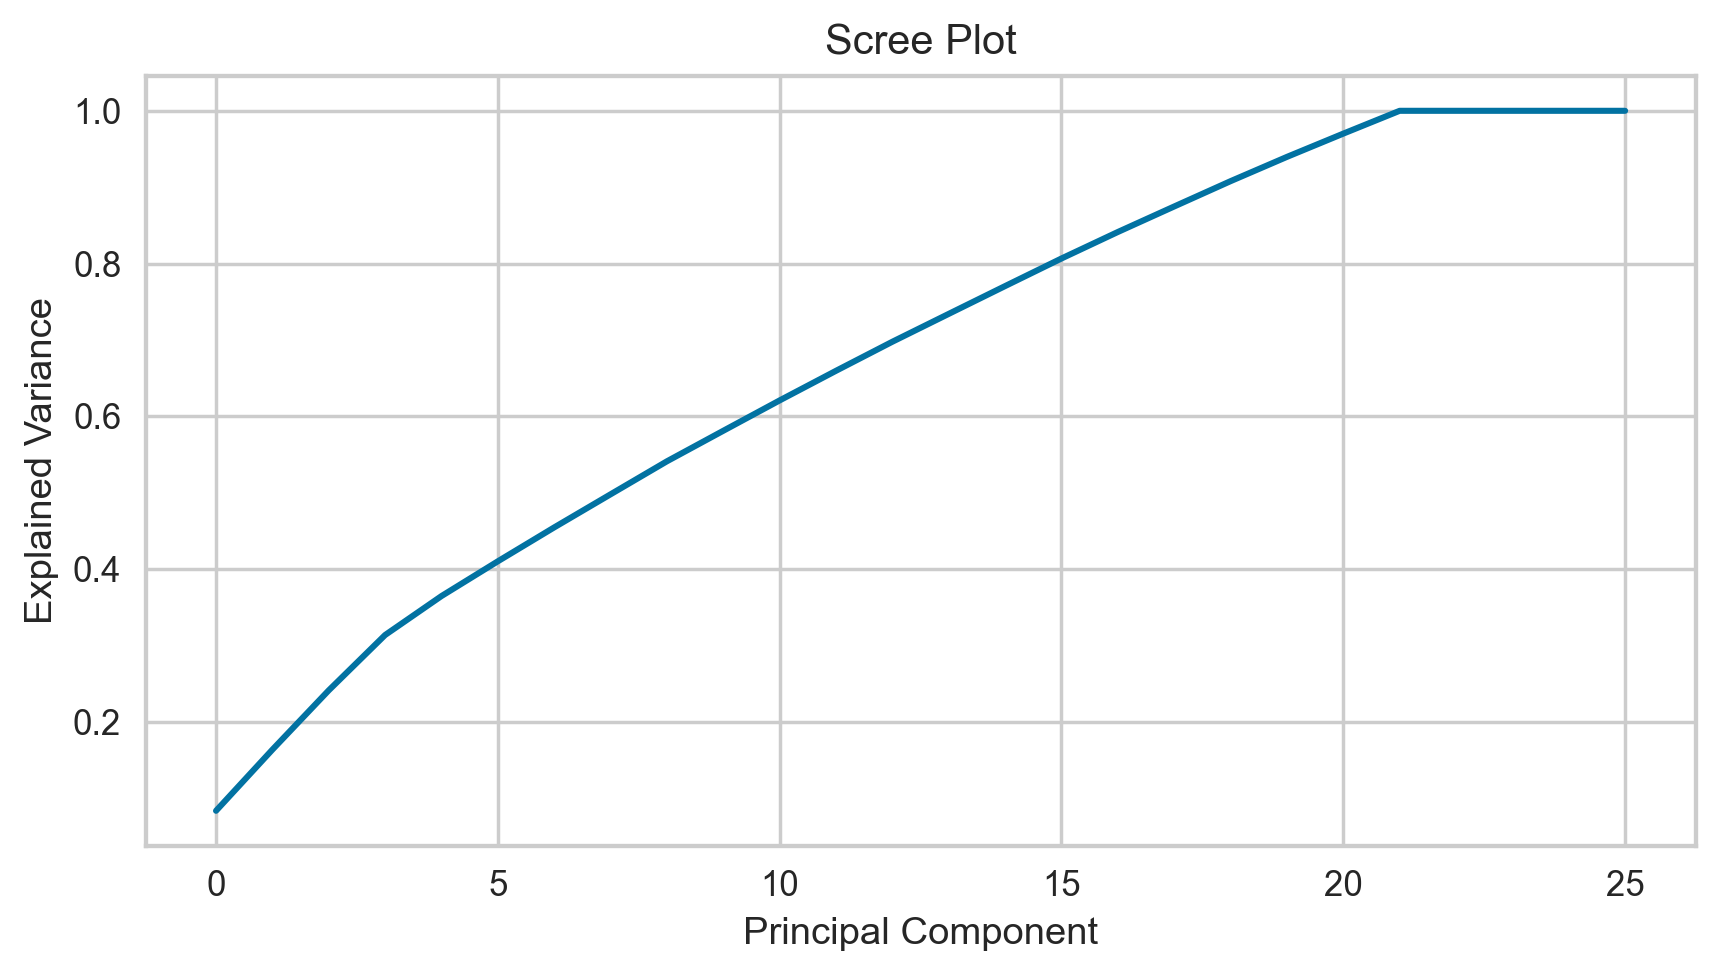

In [34]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')

In [35]:
pca = PCA(n_components=20)
pcs = pca.fit_transform(x)
pcs

array([[-2.29180715, -1.85381639,  1.35940518, ...,  0.58765187,
         0.89029735,  0.22339237],
       [ 1.39189222, -0.18962112, -2.01036166, ...,  0.51849961,
         0.5486885 , -0.19963763],
       [-1.63633562,  2.12352907,  0.3023361 , ...,  1.63623424,
         0.20633485, -0.61266387],
       ...,
       [ 1.30245698,  0.07954921,  2.61902197, ..., -0.41350854,
        -0.4870549 ,  0.53046181],
       [ 1.13789273, -0.31085821, -2.5717593 , ...,  0.95463946,
        -2.68206181,  0.04049827],
       [ 2.66397043, -0.28988444,  0.38901775, ...,  1.02330427,
        -1.85434772,  0.02535559]])

In [36]:
Data = pd.DataFrame(pcs, columns=[f'PC{i+1}' for i in range(pcs.shape[1])])
Data['class'] = y
Data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -2.291807 -1.853816  1.359405  0.101269 -0.664445 -0.086344 -1.203317   
1     1.391892 -0.189621 -2.010362  1.785861 -0.532763 -0.494388 -0.621232   
2    -1.636336  2.123529  0.302336 -0.611613 -1.741862 -0.540963  0.616947   
3     0.101744 -0.681569  0.213436 -2.878808 -0.898716  0.193125  1.138990   
4     2.115840  1.171105 -1.040529  0.026732 -1.049387 -0.931468 -0.848173   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.871953  0.256753  2.886306  0.370386  0.651828 -0.013944  0.063331   
1996  1.066287  0.192366  2.423208  0.276843 -0.973118 -0.553962 -1.057858   
1997  1.302457  0.079549  2.619022  0.536747 -1.005836  0.521087  0.658284   
1998  1.137893 -0.310858 -2.571759  1.332326  0.322479  1.742106  0.595855   
1999  2.663970 -0.289884  0.389018 -1.094931 -1.297027 -0.156807 -0.348203   

           PC8       PC9      PC10  ...      PC12      PC13      PC14  \
0    -1.833903  0.558157  1.306171  ... -0.180293  1.433747 -0.433865   
1    -3.072670  0.434997 -1.030616  ...  1.225893  0.827207  1.271943   
2     0.691417 -0.403671  0.617319  ...  1.144821 -0.851499 -0.104915   
3     0.289901 -2.331783  0.660821  ... -1.928229 -1.228629  0.463896   
4     0.925646  0.173896  2.033566  ...  0.041139 -0.383589  0.092018   
...        ...       ...       ...  ...       ...       ...       ...   
1995  0.344708 -1.005401  0.340451  ...  0.844636 -1.328822 -1.085678   
1996  2.059644  1.902117  1.019039  ...  1.872172  0.126809  0.068213   
1997 -2.550981 -0.424974  0.386806  ... -0.182693 -0.261040 -1.156301   
1998  0.508516  0.779432  0.766302  ... -1.420072  0.296613  1.789204   
1999  0.720427 -1.000253 -0.687778  ...  0.487698 -0.450340  0.333953   

          PC15      PC16      PC17      PC18      PC19      PC20  class  
0     0.986006 -0.480115  1.645568  0.587652  0.890297  0.223392      1  
1    -0.693386  0.082364  1.308435  0.518500  0.548689 -0.199638      0  
2     0.479450 -0.647439  1.578784  1.636234  0.206335 -0.612664      1  
3    -1.162110  0.172469 -0.944252  0.737008  1.066962  0.681788      1  
4     0.265642 -0.675642  0.615003 -0.936806 -1.809723  0.185836      1  
...        ...       ...       ...       ...       ...       ...    ...  
1995  1.438625 -0.499631 -0.243637 -0.041789  1.669511  1.190339      1  
1996  0.555570  0.162873  1.298941  0.616798 -0.520944 -0.341437      1  
1997 -1.234327 -0.690578  0.824367 -0.413509 -0.487055  0.530462      1  
1998 -0.797655  0.534289 -0.942506  0.954639 -2.682062  0.040498      1  
1999  1.534636  0.203987 -0.141312  1.023304 -1.854348  0.025356      1  

[2000 rows x 21 columns]

<Axes: xlabel='PC1', ylabel='PC2'>

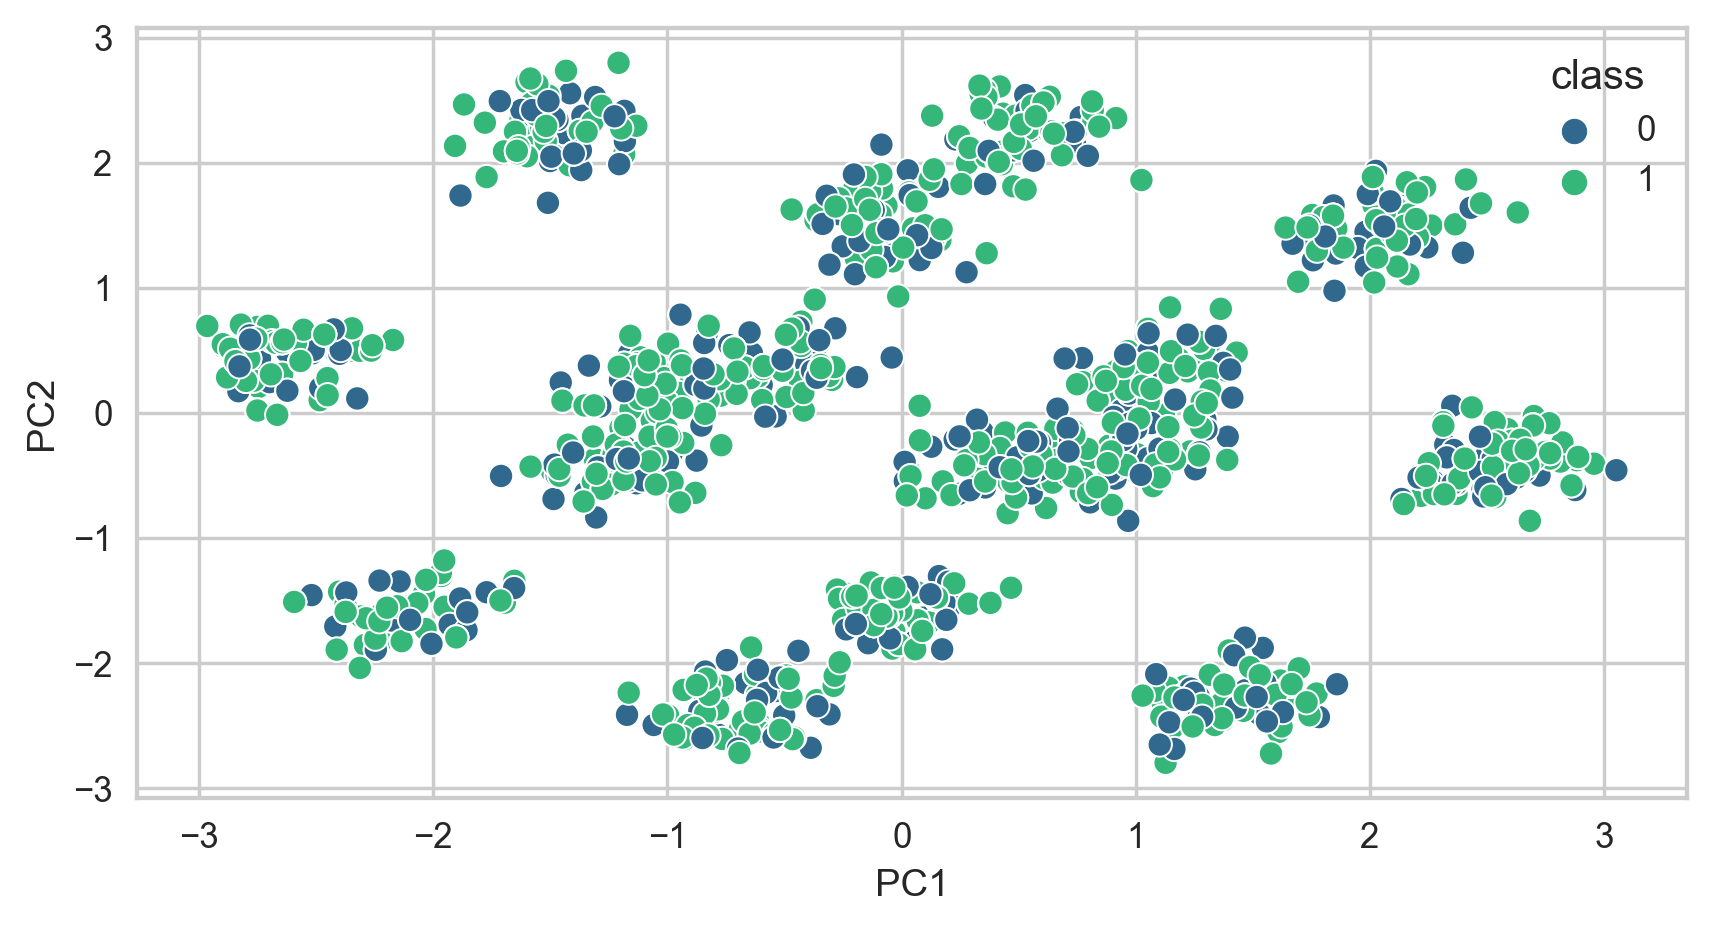

In [37]:
# Visualizing PC's
sns.scatterplot(x = Data['PC1'], y = Data['PC2'], hue = Data['class'], palette='viridis')

In [38]:
pe.scatter_3d(x = Data['PC1'], y = Data['PC2'], z = Data['PC3'], color= Data['class'])

In [39]:
x = Data.iloc[:, :-1]
y = Data['class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
svc = SVC()
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(f'Training Accuracy = {svc.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {svc.score(xtest, ytest)}')
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

Training Accuracy = 0.845625
Testing Accuracy = 0.755
              precision    recall  f1-score   support

           0       0.91      0.29      0.44       133
           1       0.74      0.99      0.84       267

    accuracy                           0.76       400
   macro avg       0.82      0.64      0.64       400
weighted avg       0.79      0.76      0.71       400

[[ 39  94]
 [  4 263]]


In [41]:
# Still model is overfitted

In [42]:
# Performing gridsearchcv for hyperparameter tunning

In [43]:
param = {
    'kernel' : ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVC(), param_grid = param, verbose = 1)
grid.fit(xtrain, ytrain)
grid.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


{'kernel': 'poly'}

In [44]:
svc = SVC(kernel='poly')
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(f'Training Accuracy = {svc.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {svc.score(xtest, ytest)}')
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

Training Accuracy = 0.904375
Testing Accuracy = 0.7825
              precision    recall  f1-score   support

           0       0.81      0.45      0.58       133
           1       0.78      0.95      0.85       267

    accuracy                           0.78       400
   macro avg       0.79      0.70      0.72       400
weighted avg       0.79      0.78      0.76       400

[[ 60  73]
 [ 14 253]]


In [45]:
# Accuracies are increased but the model is still overfitted.
# This overfitting is due to less no. of records to train model or due to outlier datapoints

In [46]:
# Checking for outliers using isolation forest alogrithm.
iso = IsolationForest()
iso.fit(Data)
outliers = iso.predict(Data)
Data['outliers'] = outliers
Data[Data['outliers'] == -1]

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
29   -2.143759 -1.345926  1.163140 -0.000784 -0.448957  1.340091 -1.286686   
109  -2.143759 -1.345926  1.163140 -0.000784 -0.448957  1.340091 -1.286686   
174  -1.538212  2.283423  0.330052 -0.898802 -0.385182 -0.084169  0.606289   
211  -0.363027  0.281870  0.204173  3.186191 -0.048243  1.970999 -0.849635   
309   2.357399 -0.295586  0.811481 -0.940051  1.914049  0.336952 -1.140314   
331   0.974412 -0.083881  2.725585  0.265640 -1.178022 -1.859842  0.460724   
354  -1.538212  2.283423  0.330052 -0.898802 -0.385182 -0.084169  0.606289   
365   2.357399 -0.295586  0.811481 -0.940051  1.914049  0.336952 -1.140314   
470  -1.058962 -2.493330 -1.035469 -1.481616  0.319924  0.045275  0.391929   
501   2.357399 -0.295586  0.811481 -0.940051  1.914049  0.336952 -1.140314   
755  -2.143759 -1.345926  1.163140 -0.000784 -0.448957  1.340091 -1.286686   
762  -0.388510 -2.675748 -0.840326 -1.233641 -0.083506 -0.366766 -0.774458   
811  -0.388510 -2.675748 -0.840326 -1.233641 -0.083506 -0.366766 -0.774458   
999  -0.388510 -2.675748 -0.840326 -1.233641 -0.083506 -0.366766 -0.774458   
1013  0.966962 -0.861884 -1.942205  1.903768 -0.376767 -0.942871 -0.780874   
1019 -0.119512  1.622639 -1.487464 -1.771250  0.280023  1.382655  1.675090   
1106 -0.597767  0.224758 -0.439711  2.590295  1.720911 -0.683225  0.362956   
1139  0.974412 -0.083881  2.725585  0.265640 -1.178022 -1.859842  0.460724   
1307 -2.143759 -1.345926  1.163140 -0.000784 -0.448957  1.340091 -1.286686   
1402 -1.538212  2.283423  0.330052 -0.898802 -0.385182 -0.084169  0.606289   
1654  0.974412 -0.083881  2.725585  0.265640 -1.178022 -1.859842  0.460724   
1662 -2.143759 -1.345926  1.163140 -0.000784 -0.448957  1.340091 -1.286686   
1678 -0.363027  0.281870  0.204173  3.186191 -0.048243  1.970999 -0.849635   
1847 -0.363027  0.281870  0.204173  3.186191 -0.048243  1.970999 -0.849635   

           PC8       PC9      PC10  ...      PC13      PC14      PC15  \
29   -1.189114  0.982039 -0.361722  ...  1.889554  1.495061  3.045123   
109  -1.189114  0.982039 -0.361722  ...  1.889554  1.495061  3.045123   
174   0.433227 -0.248148 -0.890111  ... -1.624986  0.006877 -0.506358   
211  -1.677726 -0.216636  1.566578  ...  0.880751  0.235483  0.852129   
309  -0.217255  0.326732 -0.610753  ...  1.907445  0.541435  2.162540   
331   0.272151  1.799224  1.445596  ...  1.226131 -0.044925 -1.300553   
354   0.433227 -0.248148 -0.890111  ... -1.624986  0.006877 -0.506358   
365  -0.217255  0.326732 -0.610753  ...  1.907445  0.541435  2.162540   
470   2.089816  1.133136  0.304802  ... -1.489422 -0.360068 -1.448803   
501  -0.217255  0.326732 -0.610753  ...  1.907445  0.541435  2.162540   
755  -1.189114  0.982039 -0.361722  ...  1.889554  1.495061  3.045123   
762  -2.372800  1.840174 -0.442184  ... -1.024196 -0.429336 -1.244994   
811  -2.372800  1.840174 -0.442184  ... -1.024196 -0.429336 -1.244994   
999  -2.372800  1.840174 -0.442184  ... -1.024196 -0.429336 -1.244994   
1013 -2.476622  0.503661  1.593492  ... -0.483038 -0.390149 -0.932594   
1019 -0.918211  0.175053 -0.667397  ... -0.178946 -0.441420 -1.945811   
1106  0.760256  1.301250 -0.291010  ... -1.525182 -1.393242  1.107719   
1139  0.272151  1.799224  1.445596  ...  1.226131 -0.044925 -1.300553   
1307 -1.189114  0.982039 -0.361722  ...  1.889554  1.495061  3.045123   
1402  0.433227 -0.248148 -0.890111  ... -1.624986  0.006877 -0.506358   
1654  0.272151  1.799224  1.445596  ...  1.226131 -0.044925 -1.300553   
1662 -1.189114  0.982039 -0.361722  ...  1.889554  1.495061  3.045123   
1678 -1.677726 -0.216636  1.566578  ...  0.880751  0.235483  0.852129   
1847 -1.677726 -0.216636  1.566578  ...  0.880751  0.235483  0.852129   

          PC16      PC17      PC18      PC19      PC20  class  outliers  
29   -0.148419  0.212676  0.939340  0.752366 -0.479458      0        -1  
109  -0.148419  0.212676  0.939340  0.752366 -0.479458      0        -1  
174   0.9114

In [47]:
# There is 18 records in Data with outlier values / datapoints

In [48]:
DATA = Data[Data['outliers'] == 1]
DATA

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -2.291807 -1.853816  1.359405  0.101269 -0.664445 -0.086344 -1.203317   
1     1.391892 -0.189621 -2.010362  1.785861 -0.532763 -0.494388 -0.621232   
2    -1.636336  2.123529  0.302336 -0.611613 -1.741862 -0.540963  0.616947   
3     0.101744 -0.681569  0.213436 -2.878808 -0.898716  0.193125  1.138990   
4     2.115840  1.171105 -1.040529  0.026732 -1.049387 -0.931468 -0.848173   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.871953  0.256753  2.886306  0.370386  0.651828 -0.013944  0.063331   
1996  1.066287  0.192366  2.423208  0.276843 -0.973118 -0.553962 -1.057858   
1997  1.302457  0.079549  2.619022  0.536747 -1.005836  0.521087  0.658284   
1998  1.137893 -0.310858 -2.571759  1.332326  0.322479  1.742106  0.595855   
1999  2.663970 -0.289884  0.389018 -1.094931 -1.297027 -0.156807 -0.348203   

           PC8       PC9      PC10  ...      PC13      PC14      PC15  \
0    -1.833903  0.558157  1.306171  ...  1.433747 -0.433865  0.986006   
1    -3.072670  0.434997 -1.030616  ...  0.827207  1.271943 -0.693386   
2     0.691417 -0.403671  0.617319  ... -0.851499 -0.104915  0.479450   
3     0.289901 -2.331783  0.660821  ... -1.228629  0.463896 -1.162110   
4     0.925646  0.173896  2.033566  ... -0.383589  0.092018  0.265642   
...        ...       ...       ...  ...       ...       ...       ...   
1995  0.344708 -1.005401  0.340451  ... -1.328822 -1.085678  1.438625   
1996  2.059644  1.902117  1.019039  ...  0.126809  0.068213  0.555570   
1997 -2.550981 -0.424974  0.386806  ... -0.261040 -1.156301 -1.234327   
1998  0.508516  0.779432  0.766302  ...  0.296613  1.789204 -0.797655   
1999  0.720427 -1.000253 -0.687778  ... -0.450340  0.333953  1.534636   

          PC16      PC17      PC18      PC19      PC20  class  outliers  
0    -0.480115  1.645568  0.587652  0.890297  0.223392      1         1  
1     0.082364  1.308435  0.518500  0.548689 -0.199638      0         1  
2    -0.647439  1.578784  1.636234  0.206335 -0.612664      1         1  
3     0.172469 -0.944252  0.737008  1.066962  0.681788      1         1  
4    -0.675642  0.615003 -0.936806 -1.809723  0.185836      1         1  
...        ...       ...       ...       ...       ...    ...       ...  
1995 -0.499631 -0.243637 -0.041789  1.669511  1.190339      1         1  
1996  0.162873  1.298941  0.616798 -0.520944 -0.341437      1         1  
1997 -0.690578  0.824367 -0.413509 -0.487055  0.530462      1         1  
1998  0.534289 -0.942506  0.954639 -2.682062  0.040498      1         1  
1999  0.203987 -0.141312  1.023304 -1.854348  0.025356      1         1  

[1976 rows x 22 columns]

In [49]:
# Performing PPS (Predictive Power Score) for getting correlations within non-linear columns

In [50]:
ps.score(DATA, x = 'PC1', y = 'class')
feature_sel = ps.matrix(DATA)
feature_sel[feature_sel['y'] == 'class']

x      y   ppscore            case  is_valid_score  \
20        PC1  class  0.562500      regression            True   
42        PC2  class  0.522569      regression            True   
64        PC3  class  0.496528      regression            True   
86        PC4  class  0.489583      regression            True   
108       PC5  class  0.505208      regression            True   
130       PC6  class  0.508681      regression            True   
152       PC7  class  0.590278      regression            True   
174       PC8  class  0.539931      regression            True   
196       PC9  class  0.546875      regression            True   
218      PC10  class  0.532986      regression            True   
240      PC11  class  0.517361      regression            True   
262      PC12  class  0.531250      regression            True   
284      PC13  class  0.552083      regression            True   
306      PC14  class  0.529514      regression            True   
328      PC15  class  0.564236      regression            True   
350      PC16  class  0.532986      regression            True   
372      PC17  class  0.520833      regression            True   
394      PC18  class  0.510417      regression            True   
416      PC19  class  0.505208      regression            True   
438      PC20  class  0.510417      regression            True   
460     class  class  1.000000  predict_itself            True   
482  outliers  class  0.000000      regression            True   

                  metric  baseline_score  model_score                    model  
20   mean absolute error        0.291498     0.127530  DecisionTreeRegressor()  
42   mean absolute error        0.291498     0.139170  DecisionTreeRegressor()  
64   mean absolute error        0.291498     0.146761  DecisionTreeRegressor()  
86   mean absolute error        0.291498     0.148785  DecisionTreeRegressor()  
108  mean absolute error        0.291498     0.144231  DecisionTreeRegressor()  
130  mean absolute error        0.291498     0.143219  DecisionTreeRegressor()  
152  mean absolute error        0.291498     0.119433  DecisionTreeRegressor()  
174  mean absolute error        0.291498     0.134109  DecisionTreeRegressor()  
196  mean absolute error        0.291498     0.132085  DecisionTreeRegressor()  
218  mean absolute error        0.291498     0.136134  DecisionTreeRegressor()  
240  mean absolute error        0.291498     0.140688  DecisionTreeRegressor()  
262  mean absolute error        0.291498     0.136640  DecisionTreeRegressor()  
284  mean absolute error        0.291498     0.130567  DecisionTreeRegressor()  
306  mean absolute error        0.291498     0.137146  DecisionTreeRegressor()  
328  mean absolute error        0.291498     0.127024  DecisionTreeRegressor()  
350  mean absolute error        0.291498     0.136134  DecisionTreeRegressor()  
372  mean absolute error        0.291498     0.139676  DecisionTreeRegressor()  
394  mean absolute error        0.291498     0.142713  DecisionTreeRegressor()  
416  mean absolute error        0.291498     0.144231  DecisionTreeRegressor()  
438  mean absolute error        0.291498     0.142713  DecisionTreeRegressor()  
460                 None        0.000000     1.000000                     None  
482  mean absolute error        0.291498     0.413584  DecisionTreeRegressor()

In [51]:
ps.score(DATA, x = 'PC1', y = 'class')
feature_sel = ps.matrix(DATA)
feature_sel[feature_sel['y'] == 'class']

x      y   ppscore            case  is_valid_score  \
20        PC1  class  0.562500      regression            True   
42        PC2  class  0.522569      regression            True   
64        PC3  class  0.496528      regression            True   
86        PC4  class  0.489583      regression            True   
108       PC5  class  0.505208      regression            True   
130       PC6  class  0.508681      regression            True   
152       PC7  class  0.590278      regression            True   
174       PC8  class  0.539931      regression            True   
196       PC9  class  0.546875      regression            True   
218      PC10  class  0.532986      regression            True   
240      PC11  class  0.517361      regression            True   
262      PC12  class  0.531250      regression            True   
284      PC13  class  0.552083      regression            True   
306      PC14  class  0.529514      regression            True   
328      PC15  class  0.564236      regression            True   
350      PC16  class  0.532986      regression            True   
372      PC17  class  0.520833      regression            True   
394      PC18  class  0.510417      regression            True   
416      PC19  class  0.505208      regression            True   
438      PC20  class  0.510417      regression            True   
460     class  class  1.000000  predict_itself            True   
482  outliers  class  0.000000      regression            True   

                  metric  baseline_score  model_score                    model  
20   mean absolute error        0.291498     0.127530  DecisionTreeRegressor()  
42   mean absolute error        0.291498     0.139170  DecisionTreeRegressor()  
64   mean absolute error        0.291498     0.146761  DecisionTreeRegressor()  
86   mean absolute error        0.291498     0.148785  DecisionTreeRegressor()  
108  mean absolute error        0.291498     0.144231  DecisionTreeRegressor()  
130  mean absolute error        0.291498     0.143219  DecisionTreeRegressor()  
152  mean absolute error        0.291498     0.119433  DecisionTreeRegressor()  
174  mean absolute error        0.291498     0.134109  DecisionTreeRegressor()  
196  mean absolute error        0.291498     0.132085  DecisionTreeRegressor()  
218  mean absolute error        0.291498     0.136134  DecisionTreeRegressor()  
240  mean absolute error        0.291498     0.140688  DecisionTreeRegressor()  
262  mean absolute error        0.291498     0.136640  DecisionTreeRegressor()  
284  mean absolute error        0.291498     0.130567  DecisionTreeRegressor()  
306  mean absolute error        0.291498     0.137146  DecisionTreeRegressor()  
328  mean absolute error        0.291498     0.127024  DecisionTreeRegressor()  
350  mean absolute error        0.291498     0.136134  DecisionTreeRegressor()  
372  mean absolute error        0.291498     0.139676  DecisionTreeRegressor()  
394  mean absolute error        0.291498     0.142713  DecisionTreeRegressor()  
416  mean absolute error        0.291498     0.144231  DecisionTreeRegressor()  
438  mean absolute error        0.291498     0.142713  DecisionTreeRegressor()  
460                 None        0.000000     1.000000                     None  
482  mean absolute error        0.291498     0.413584  DecisionTreeRegressor()

In [52]:
# Looks like all columns selected after Black Box Algorithm (PCA) are important.

In [53]:
# Creating final models using outlier free DATA.
x = DATA.drop(columns=['class', 'outliers'])
y = DATA['class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
svc = SVC()
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(f'Training Accuracy = {svc.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {svc.score(xtest, ytest)}')
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

Training Accuracy = 0.8379746835443038
Testing Accuracy = 0.7777777777777778
              precision    recall  f1-score   support

           0       0.85      0.33      0.48       121
           1       0.77      0.97      0.86       275

    accuracy                           0.78       396
   macro avg       0.81      0.65      0.67       396
weighted avg       0.79      0.78      0.74       396

[[ 40  81]
 [  7 268]]


In [55]:
svc = SVC(kernel='linear')
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(f'Training Accuracy = {svc.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {svc.score(xtest, ytest)}')
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

Training Accuracy = 0.7120253164556962
Testing Accuracy = 0.6944444444444444
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.69      1.00      0.82       275

    accuracy                           0.69       396
   macro avg       0.35      0.50      0.41       396
weighted avg       0.48      0.69      0.57       396

[[  0 121]
 [  0 275]]


In [56]:
svc = SVC(kernel='poly')
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(f'Training Accuracy = {svc.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {svc.score(xtest, ytest)}')
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

Training Accuracy = 0.9069620253164556
Testing Accuracy = 0.8207070707070707
              precision    recall  f1-score   support

           0       0.83      0.52      0.64       121
           1       0.82      0.95      0.88       275

    accuracy                           0.82       396
   macro avg       0.82      0.74      0.76       396
weighted avg       0.82      0.82      0.81       396

[[ 63  58]
 [ 13 262]]


In [57]:
# here the final robust / generalized model is model created with [Kernel = 'linear']

In [58]:
model = SVC(kernel='linear')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(f'Training Accuracy = {model.score(xtrain, ytrain)}')
print(f'Testing Accuracy = {model.score(xtest, ytest)}')
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

Training Accuracy = 0.7120253164556962
Testing Accuracy = 0.6944444444444444
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.69      1.00      0.82       275

    accuracy                           0.69       396
   macro avg       0.35      0.50      0.41       396
weighted avg       0.48      0.69      0.57       396

[[  0 121]
 [  0 275]]


In [59]:
def plot_decision_boundary(X, y, model, title='Decision Boundary'):
    if x.shape[1] > 2:
        raise ValueError("X should have exactly 2 features for decision boundary plot")

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

In [60]:
X_reduced = PCA(n_components=2).fit_transform(x)

In [61]:
xtrain_reduced, xtest_reduced, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
svc_reduced = SVC(kernel='linear')
svc_reduced.fit(xtrain_reduced, ytrain)

# Plot decision boundary
plot_decision_boundary(xtrain_reduced, ytrain, svc_reduced, title='Decision Boundary on Training Data')
plot_decision_boundary(xtest_reduced, ytest, svc_reduced, title='Decision Boundary on Testing Data')

ValueError: X should have exactly 2 features for decision boundary plot

In [ ]:
# Tried to visualize Decision boundaries but can't.